In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import io
from PIL import Image
import scipy.stats as stats

In [2]:
os.getcwd()

'e:\\qw_projects\\mippi\\src'

In [88]:
df = pd.read_csv(r'../data/psymukb/after_predict/psymukb_biogrid_processed_with_regular_aa.csv')
df_pred = pd.read_csv(r'../data/psymukb/after_predict/after_predict_brief.csv')
master_table = pd.read_csv(r'../data/psymukb/processed_psymukb.csv')

D:\SoftWare\Anaconda\envs\dl\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,10,11,15,21,22,23,28,29,32,46,47,58,59,61,70,71,73,74,78,80,82,90,91,93,94,96,105,106,110,111,124,125,144,145,146,148,149,150,151,152,153,154,155) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\SoftWare\Anaconda\envs\dl\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (14,16,152) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [89]:
print('{}\n{}\n{}'.format(df.shape, df_pred.shape, master_table.shape))

(204440, 170)
(204440, 16)
(19228, 168)


In [90]:
master_table['var_abbr'] = master_table['refseq_mrna'] + '_' + master_table['protein_ori'] + master_table['protein_pos'].astype(str) + master_table['protein_mut']

## merge df_pred and df into one table

In [91]:
df

Unnamed: 0 1000G_AFR 1000G_ALL 1000G_AMR 1000G_EAS 1000G_EUR  \
0                0         .         .         .         .         .   
1                1         .         .         .         .         .   
2                2         .         .         .         .         .   
3                3         .         .         .         .         .   
4                4         .         .         .         .         .   
...            ...       ...       ...       ...       ...       ...   
204435      204435         .         .         .         .         .   
204436      204436         .         .         .         .         .   
204437      204437         .         .         .         .         .   
204438      204438         .         .         .         .         .   
204439      204439         .         .         .         .         .   

       1000G_SAS                             AAChange.refGene Alt CADD_phred  \
0              .  DYNC1H1:NM_001376:exon61:c.A11465C:p.H3822P   C       26.4   
1              .  DYNC1H1:NM_001376:exon61:c.A11465C:p.H3822P   C       26.4   
2              .  DYNC1H1:NM_001376:exon61:c.A11465C:p.H3822P   C       26.4   
3              .  DYNC1H1:NM_001376:exon61:c.A11465C:p.H3822P   C       26.4   
4              .  DYNC1H1:NM_001376:exon61:c.A11465C:p.H3822P   C       26.4   
...          ...                                          ...  ..        ...   
204435         .      HUWE1:NM_031407:exon15:c.C1205T:p.A402V   A       26.1   
204436         .      HUWE1:NM_031407:exon15:c.C1205T:p.A402V   A       26.1   
204437         .      HUWE1:NM_031407:exon15:c.C1205T:p.A402V   A       26.1   
204438         .      HUWE1:NM_031407:exon15:c.C1205T:p.A402V   A       26.1   
204439         .      HUWE1:NM_031407:exon15:c.C1205T:p.A402V   A       26.1   

        ... pro_start pro_target_geneid protein_mut protein_ori protein_pos  \
0       ...         .                 .           P           H        3822   
1       ...         .                 .           P           H        3822   
2       ...         .                 .           P           H        3822   
3       ...         .                 .           P           H        3822   
4       ...         .                 .           P           H        3822   
...     ...       ...               ...         ...         ...         ...   
204435  ...         .                 .           V           A         402   
204436  ...         .                 .           V           A         402   
204437  ...         .                 .           V           A         402   
204438  ...         .                 .           V           A         402   
204439  ...         .                 .           V           A         402   

       protein_var refseq_mrna sex source          var_abbr  
0         p.H3822P   NM_001376   M      .  NM_001376_H3822P  
1         p.H3822P   NM_001376   M      .  NM_001376_H3822P  
2         p.H3822P   NM_001376   M      .  NM_001376_H3822P  
3         p.H3822P   NM_001376   M      .  NM_001376_H3822P  
4         p.H3822P   NM_001376   M      .  NM_001376_H3822P  
...            ...         ...  ..    ...               ...  
204435     p.A402V   NM_031407   .      .   NM_031407_A402V  
204436     p.A402V   NM_031407   .      .   NM_031407_A402V  
204437     p.A402V   NM_031407   .      .   NM_031407_A402V  
204438     p.A402V   NM_031407   .      .   NM_031407_A402V  
204439     p.A402V   NM_031407   .      .   NM_031407_A402V  

[204440 rows x 170 columns]

In [92]:
df_pred

Unnamed: 0 refseq_mrna          var_abbr  \
0                0   NM_001376  NM_001376_H3822P   
1                1   NM_001376  NM_001376_H3822P   
2                2   NM_001376  NM_001376_H3822P   
3                3   NM_001376  NM_001376_H3822P   
4                4   NM_001376  NM_001376_H3822P   
...            ...         ...               ...   
204435      204435   NM_031407   NM_031407_A402V   
204436      204436   NM_031407   NM_031407_A402V   
204437      204437   NM_031407   NM_031407_A402V   
204438      204438   NM_031407   NM_031407_A402V   
204439      204439   NM_031407   NM_031407_A402V   

       SWISS-PROT Accessions Interactor B  protein_pos uniprotAC  pred_class  \
0                                  P43034         3822    P43034           2   
1                                  Q9GZM8         3822    Q9GZM8           2   
2                                  Q9BVA0         3822    Q9BVA0           2   
3                                  O75449         3822    O75449           2   
4                                  P49810         3822    P49810           2   
...                                   ...          ...       ...         ...   
204435                             Q15910          402    Q15910           3   
204436                             Q16576          402    Q16576           3   
204437                             P11142          402    P11142           3   
204438                             P00533          402    P00533           3   
204439                             P43364          402    P43364           2   

        score_class0  score_class1  score_class2  score_class3  pred_re_class  \
0           0.220666      0.047292      0.670797      0.061245              2   
1           0.218705      0.011830      0.757938      0.011527              2   
2           0.166012      0.119448      0.522414      0.192126              2   
3           0.070847      0.004994      0.918553      0.005606              2   
4           0.115713      0.162127      0.487987      0.234173              2   
...              ...           ...           ...           ...            ...   
204435      0.215605      0.241945      0.206609      0.335840              0   
204436      0.283071      0.138291      0.251470      0.327169              0   
204437      0.030925      0.332048      0.079921      0.557107              1   
204438      0.201286      0.271130      0.149060      0.378524              1   
204439      0.278111      0.004213      0.713809      0.003866              2   

        re_score_class0  re_score_class1  re_score_class2  re_score_class3  
0              0.274580         0.044567         0.666335         0.014518  
1              0.278791         0.008243         0.709592         0.003374  
2              0.200734         0.187527         0.548448         0.063291  
3              0.089206         0.005060         0.904177         0.001557  
4              0.151559         0.228301         0.507373         0.112768  
...                 ...              ...              ...              ...  
204435         0.371194         0.342452         0.159748         0.126607  
204436         0.327819         0.274269         0.286043         0.111869  
204437         0.061913         0.594739         0.081455         0.261893  
204438         0.350401         0.394448         0.099596         0.155556  
204439         0.365615         0.004749         0.627920         0.001716  

[204440 rows x 16 columns]

In [93]:
df_plus = pd.concat([df, df_pred], axis=1)

In [94]:
df_plus = df_plus.loc[:, ~df_plus.columns.duplicated()]

In [95]:
df_plus.shape

(204440, 181)

In [96]:
df_plus.reset_index(drop=True, inplace=True)
master_table.reset_index(drop=True, inplace=True)

In [102]:
# temp PPI unit try
group1 = [45689, 16049, 86898, 16278]
group2 = [3039, 1148, 8916, 1540]
group_name = ['disrupting', 'decreasing', 'no effect', 'increasing']
adjust_cof = len(group1) * (len(group1) - 1) / 2
for i in range(len(group1) - 1):
    for j in range(i + 1, len(group1)):
        odds, p = stats.fisher_exact([[group1[i], group2[i]], [group1[j], group2[j]]])
        print('{} and {}, OR: {:.3f}, p-value: {:.5f}'.format(group_name[i], group_name[j], odds, p * adjust_cof))

disrupting and decreasing, OR: 1.075, p-value: 0.26120
disrupting and no effect, OR: 1.543, p-value: 0.00000
disrupting and increasing, OR: 1.422, p-value: 0.00000
decreasing and no effect, OR: 1.434, p-value: 0.00000
decreasing and increasing, OR: 1.323, p-value: 0.00000
no effect and increasing, OR: 0.922, p-value: 0.02859


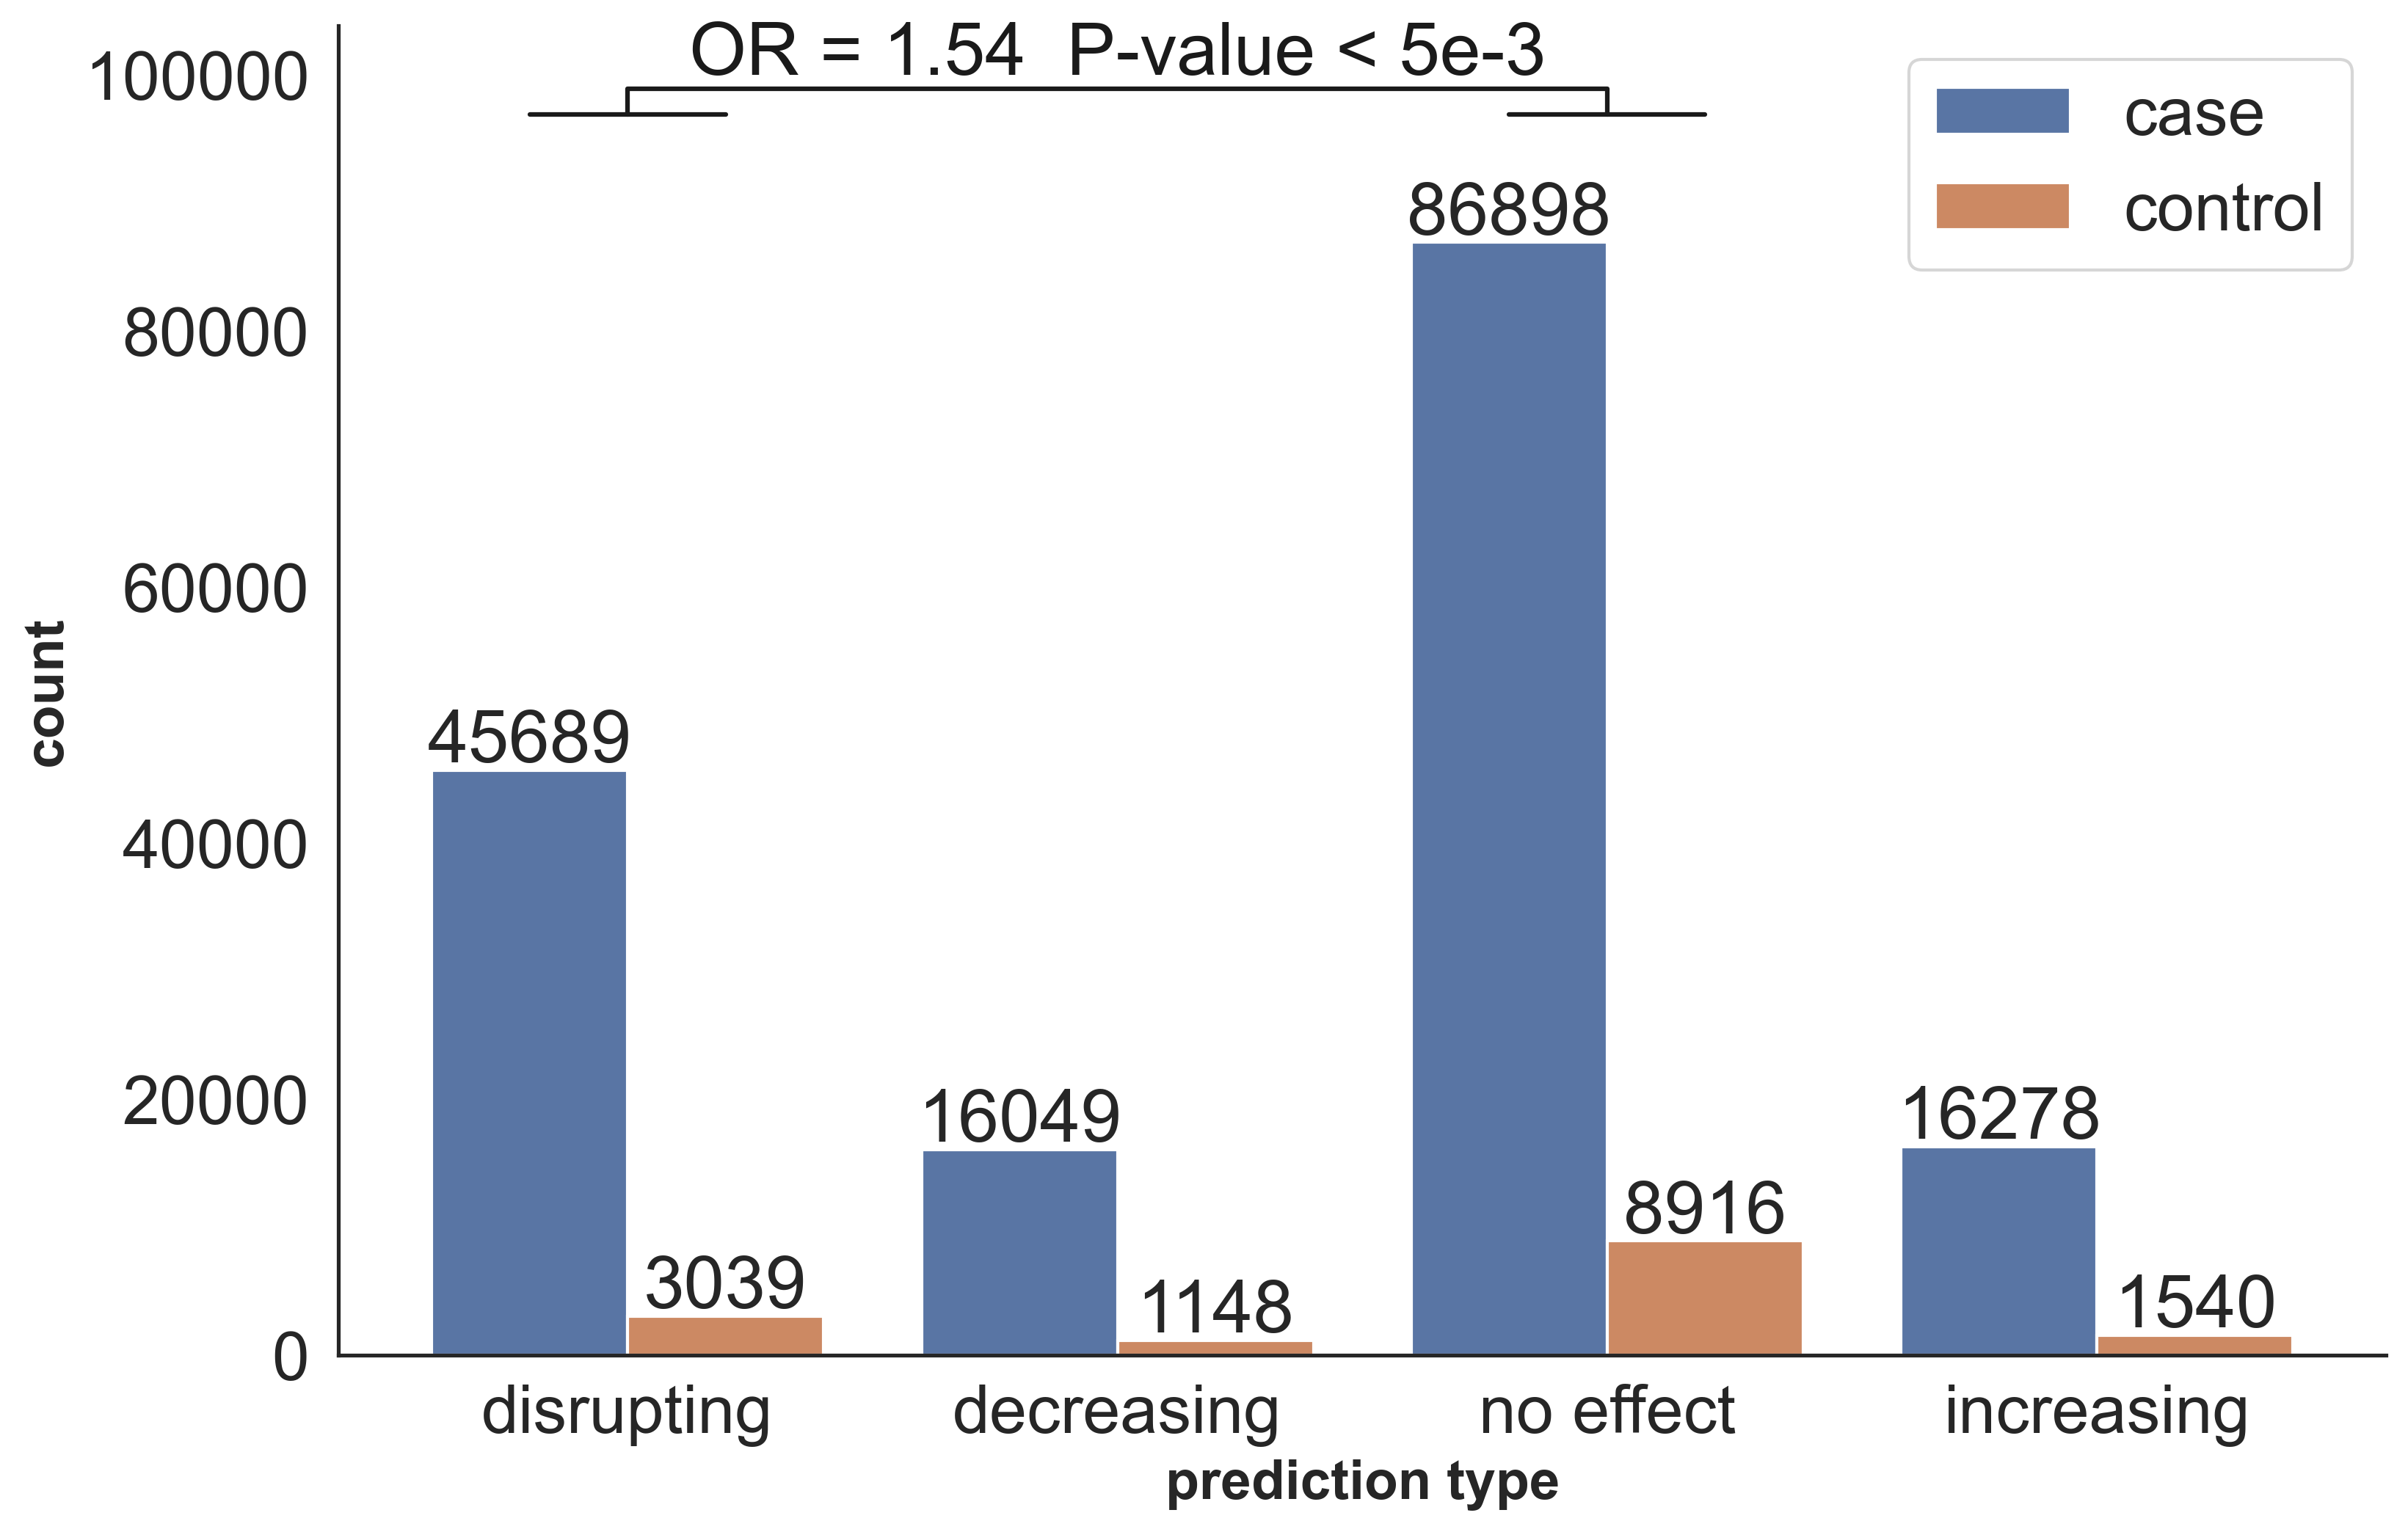

In [106]:
# temp PPI unit try
df_plus = df_plus[~(df_plus['PrimaryPhenotype'] == 'Uncharacterized (Mixed healthy control)')]
df_plus['sample_type'] = 'case'
# df_plus.loc[df_plus[df_plus['PrimaryPhenotype'] == 'Uncharacterized (Mixed healthy control)'].index, 'sample_type'] = 'control'
df_plus.loc[df_plus[df_plus['PrimaryPhenotype'] == 'Sibling Control'].index, 'sample_type'] = 'control'

df_plus['pred_class'] = df_plus['pred_class'].replace(0, 'disrupting')
df_plus['pred_class'] = df_plus['pred_class'].replace(1, 'decreasing')
df_plus['pred_class'] = df_plus['pred_class'].replace(2, 'no effect')
df_plus['pred_class'] = df_plus['pred_class'].replace(3, 'increasing')

fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
sns.set(font_scale=2, style='white')
my_order = ['disrupting', 'decreasing', 'no effect', 'increasing']
plot = sns.countplot(data=df_plus, x='pred_class', ax=ax, order=my_order, hue='sample_type')
# plt.rcParams["axes.labelsize"] = 12

for p in plot.patches:
    plot.annotate(p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set_xlabel('prediction type', fontsize=18, fontweight='bold')
ax.set_ylabel('count', fontsize=18, fontweight='bold')

# statistical annotation
x1, x2 = 0, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 86898 + 10000, 2000, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.plot([x1 - 0.2, x1 + 0.2], [y, y], lw=1.5, c=col)
plt.plot([x2 - 0.2, x2 + 0.2], [y, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "OR = 1.54  P-value < 5e-3", ha='center', va='bottom', color=col)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend().set_title('')

png1 = io.BytesIO()
plt.savefig(png1, format="png")
# Load this image into PIL
png2 = Image.open(png1)
# Save as TIFF
png2.save("../data/psymukb/after_predict/PPIunit_case_control_count_nomixhealthy.tiff", dpi=png2.info['dpi'])
png1.close()

In [18]:
pred_arr = np.zeros((master_table.shape[0], 4))
pred_re_arr = np.zeros((master_table.shape[0], 4))
for i in tqdm(master_table.index):
    df_tmp = df_plus[df_plus['var_abbr'] == master_table.loc[i, 'var_abbr']]
    pred_arr[i, 0] += sum(df_tmp['pred_class'] == 0)
    pred_arr[i, 1] += sum(df_tmp['pred_class'] == 1)
    pred_arr[i, 2] += sum(df_tmp['pred_class'] == 2)
    pred_arr[i, 3] += sum(df_tmp['pred_class'] == 3)
    pred_re_arr[i, 0] += sum(df_tmp['pred_re_class'] == 0)
    pred_re_arr[i, 1] += sum(df_tmp['pred_re_class'] == 1)
    pred_re_arr[i, 2] += sum(df_tmp['pred_re_class'] == 2)
    pred_re_arr[i, 3] += sum(df_tmp['pred_re_class'] == 3)

100%|███████████████████████████████████████████████████████████████████████████| 19228/19228 [03:06<00:00, 103.18it/s]


In [19]:
pred_arr = pred_arr.astype(int)
pred_re_arr = pred_re_arr.astype(int)

In [20]:
master_table['pred_most_common'] = pred_arr.argmax(axis=-1)
master_table['pred_disrupting'] = pred_arr[:, 0]
master_table['pred_decreasing'] = pred_arr[:, 1]
master_table['pred_noeffect'] = pred_arr[:, 2]
master_table['pred_increasing'] = pred_arr[:, 3]
master_table['pred_sum'] = pred_arr.sum(axis=-1)

master_table['pred_re_most_common'] = pred_re_arr.argmax(axis=-1)
master_table['pred_re_disrupting'] = pred_re_arr[:, 0]
master_table['pred_re_decreasing'] = pred_re_arr[:, 1]
master_table['pred_re_noeffect'] = pred_re_arr[:, 2]
master_table['pred_re_increasing'] = pred_re_arr[:, 3]

In [21]:
master_table.head()

Unnamed: 0 EntrezID  cytoBand Chr      Start        End Ref Alt Variant  \
0           0     1778  14q32.31  14  102505753  102505753   A   C     A>C   
1           1   148103  19q13.11  19   35251174   35251174   G   A     G>A   
2           2   116442      Xq28   X  154490173  154490173   G   A     G>A   
3           3     7528   14q32.2  14  100743830  100743830   G   T     G>T   
4           4   128859  20q11.21  20   31626755   31626755   G   A     G>A   

  Gene.refGene  ... pred_disrupting pred_decreasing pred_noeffect  \
0      DYNC1H1  ...               0               0            28   
1       ZNF599  ...               0               0             1   
2       RAB39B  ...               1               0             3   
3          YY1  ...               8               7            41   
4       BPIFB6  ...               0               0             0   

  pred_increasing pred_sum  pred_re_most_common pred_re_disrupting  \
0               3       31                    2                  0   
1               0        1                    2                  0   
2               0        4                    2                  1   
3               6       62                    2                  1   
4               0        0                    0                  0   

  pred_re_decreasing pred_re_noeffect pred_re_increasing  
0                  3               28                  0  
1                  0                1                  0  
2                  0                3                  0  
3                 15               44                  2  
4                  0                0                  0  

[5 rows x 180 columns]

In [22]:
master_table[-10:]

Unnamed: 0 EntrezID  cytoBand Chr     Start       End Ref Alt Variant  \
19218       20892   140893  20q13.33  20  60987790  60987790   G   A     G>A   
19219       20893     7113   21q22.3  21  42839740  42839740   G   C     G>C   
19220       20894      326   21q22.3  21  45713760  45713760   G   A     G>A   
19221       20895     5211   21q22.3  21  45726603  45726603   T   C     T>C   
19222       20897   164633   22q12.2  22  30125466  30125466   C   T     C>T   
19223       20898     3761   22q13.1  22  38822895  38822895   G   A     G>A   
19224       20899      158   22q13.1  22  40760337  40760337   A   G     A>G   
19225       20900    55586  22q13.33  22  50926403  50926403   C   T     C>T   
19226       20901    23096   Xp11.22   X  53279605  53279605   C   T     C>T   
19227       20902    10075   Xp11.22   X  53655481  53655481   G   A     G>A   

      Gene.refGene  ... pred_disrupting pred_decreasing pred_noeffect  \
19218      RBBP8NL  ...               0               0             0   
19219      TMPRSS2  ...               0               0             1   
19220         AIRE  ...               7               2            10   
19221         PFKL  ...               5               0             0   
19222        CABP7  ...               0               0             0   
19223        KCNJ4  ...               1               0             5   
19224         ADSL  ...               0               2             4   
19225         MIOX  ...               0               0             0   
19226       IQSEC2  ...               0               0             1   
19227        HUWE1  ...               3               0            22   

      pred_increasing pred_sum  pred_re_most_common pred_re_disrupting  \
19218               0        0                    0                  0   
19219               0        1                    2                  0   
19220               0       19                    2                  6   
19221               0        5                    0                  2   
19222               0        0                    0                  0   
19223               0        6                    2                  0   
19224               0        6                    2                  1   
19225               0        0                    0                  0   
19226               0        1                    2                  0   
19227              40       65                    1                 21   

      pred_re_decreasing pred_re_noeffect pred_re_increasing  
19218                  0                0                  0  
19219                  0                1                  0  
19220                  1               11                  1  
19221                  0                2                  1  
19222                  0                0                  0  
19223                  0                6                  0  
19224                  1                4                  0  
19225                  0                0                  0  
19226                  0                1                  0  
19227                 35                9                  0  

[10 rows x 180 columns]

In [23]:
master_table = master_table[~(master_table['pred_sum'] == 0)]

In [24]:
master_table.shape

(13721, 180)

In [25]:
# master_table.to_csv('../data/psymukb/psymukb_mippi_done.tsv', sep='\t')

In [107]:
# # reload start part point
master_table = pd.read_csv('../data/psymukb/psymukb_mippi_done.tsv', sep='\t')

D:\SoftWare\Anaconda\envs\dl\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,17,153) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [108]:
master_table.head()

Unnamed: 0  Unnamed: 0.1 EntrezID  cytoBand Chr      Start        End Ref  \
0           0             0     1778  14q32.31  14  102505753  102505753   A   
1           1             1   148103  19q13.11  19   35251174   35251174   G   
2           2             2   116442      Xq28   X  154490173  154490173   G   
3           3             3     7528   14q32.2  14  100743830  100743830   G   
4           6             6    10522   11p15.5  11     686979     686979   A   

  Alt Variant  ... pred_disrupting pred_decreasing pred_noeffect  \
0   C     A>C  ...               0               0            28   
1   A     G>A  ...               0               0             1   
2   A     G>A  ...               1               0             3   
3   T     G>T  ...               8               7            41   
4   C     A>C  ...               0               0             5   

  pred_increasing pred_sum pred_re_most_common  pred_re_disrupting  \
0               3       31                   2                   0   
1               0        1                   2                   0   
2               0        4                   2                   1   
3               6       62                   2                   1   
4               0        5                   2                   0   

  pred_re_decreasing pred_re_noeffect pred_re_increasing  
0                  3               28                  0  
1                  0                1                  0  
2                  0                3                  0  
3                 15               44                  2  
4                  0                5                  0  

[5 rows x 181 columns]

In [109]:
master_table['pred_most_common'].value_counts()

2    7910
0    3723
3    1146
1     942
Name: pred_most_common, dtype: int64

In [110]:
master_table['pred_most_common_type'] = master_table['pred_most_common']
master_table['pred_most_common_type'] = master_table['pred_most_common_type'].replace(0, 'disrupting')
master_table['pred_most_common_type'] = master_table['pred_most_common_type'].replace(1, 'decreasing')
master_table['pred_most_common_type'] = master_table['pred_most_common_type'].replace(2, 'no effect')
master_table['pred_most_common_type'] = master_table['pred_most_common_type'].replace(3, 'increasing')

In [111]:
master_table['sample_type'] = 'case'
master_table.loc[master_table[master_table['PrimaryPhenotype'] == 'Uncharacterized (Mixed healthy control)'].index, 'sample_type'] = 'control'
master_table.loc[master_table[master_table['PrimaryPhenotype'] == 'Sibling Control'].index, 'sample_type'] = 'control'

In [112]:
master_table['pred_most_common_type'].value_counts()

no effect     7910
disrupting    3723
increasing    1146
decreasing     942
Name: pred_most_common_type, dtype: int64

In [113]:
master_table.shape

(13721, 183)

In [114]:
# to save a total table copy, run only once
master_table_original = master_table

In [115]:
master_table = master_table[~(master_table['PrimaryPhenotype'] == 'Uncharacterized (Mixed healthy control)')]

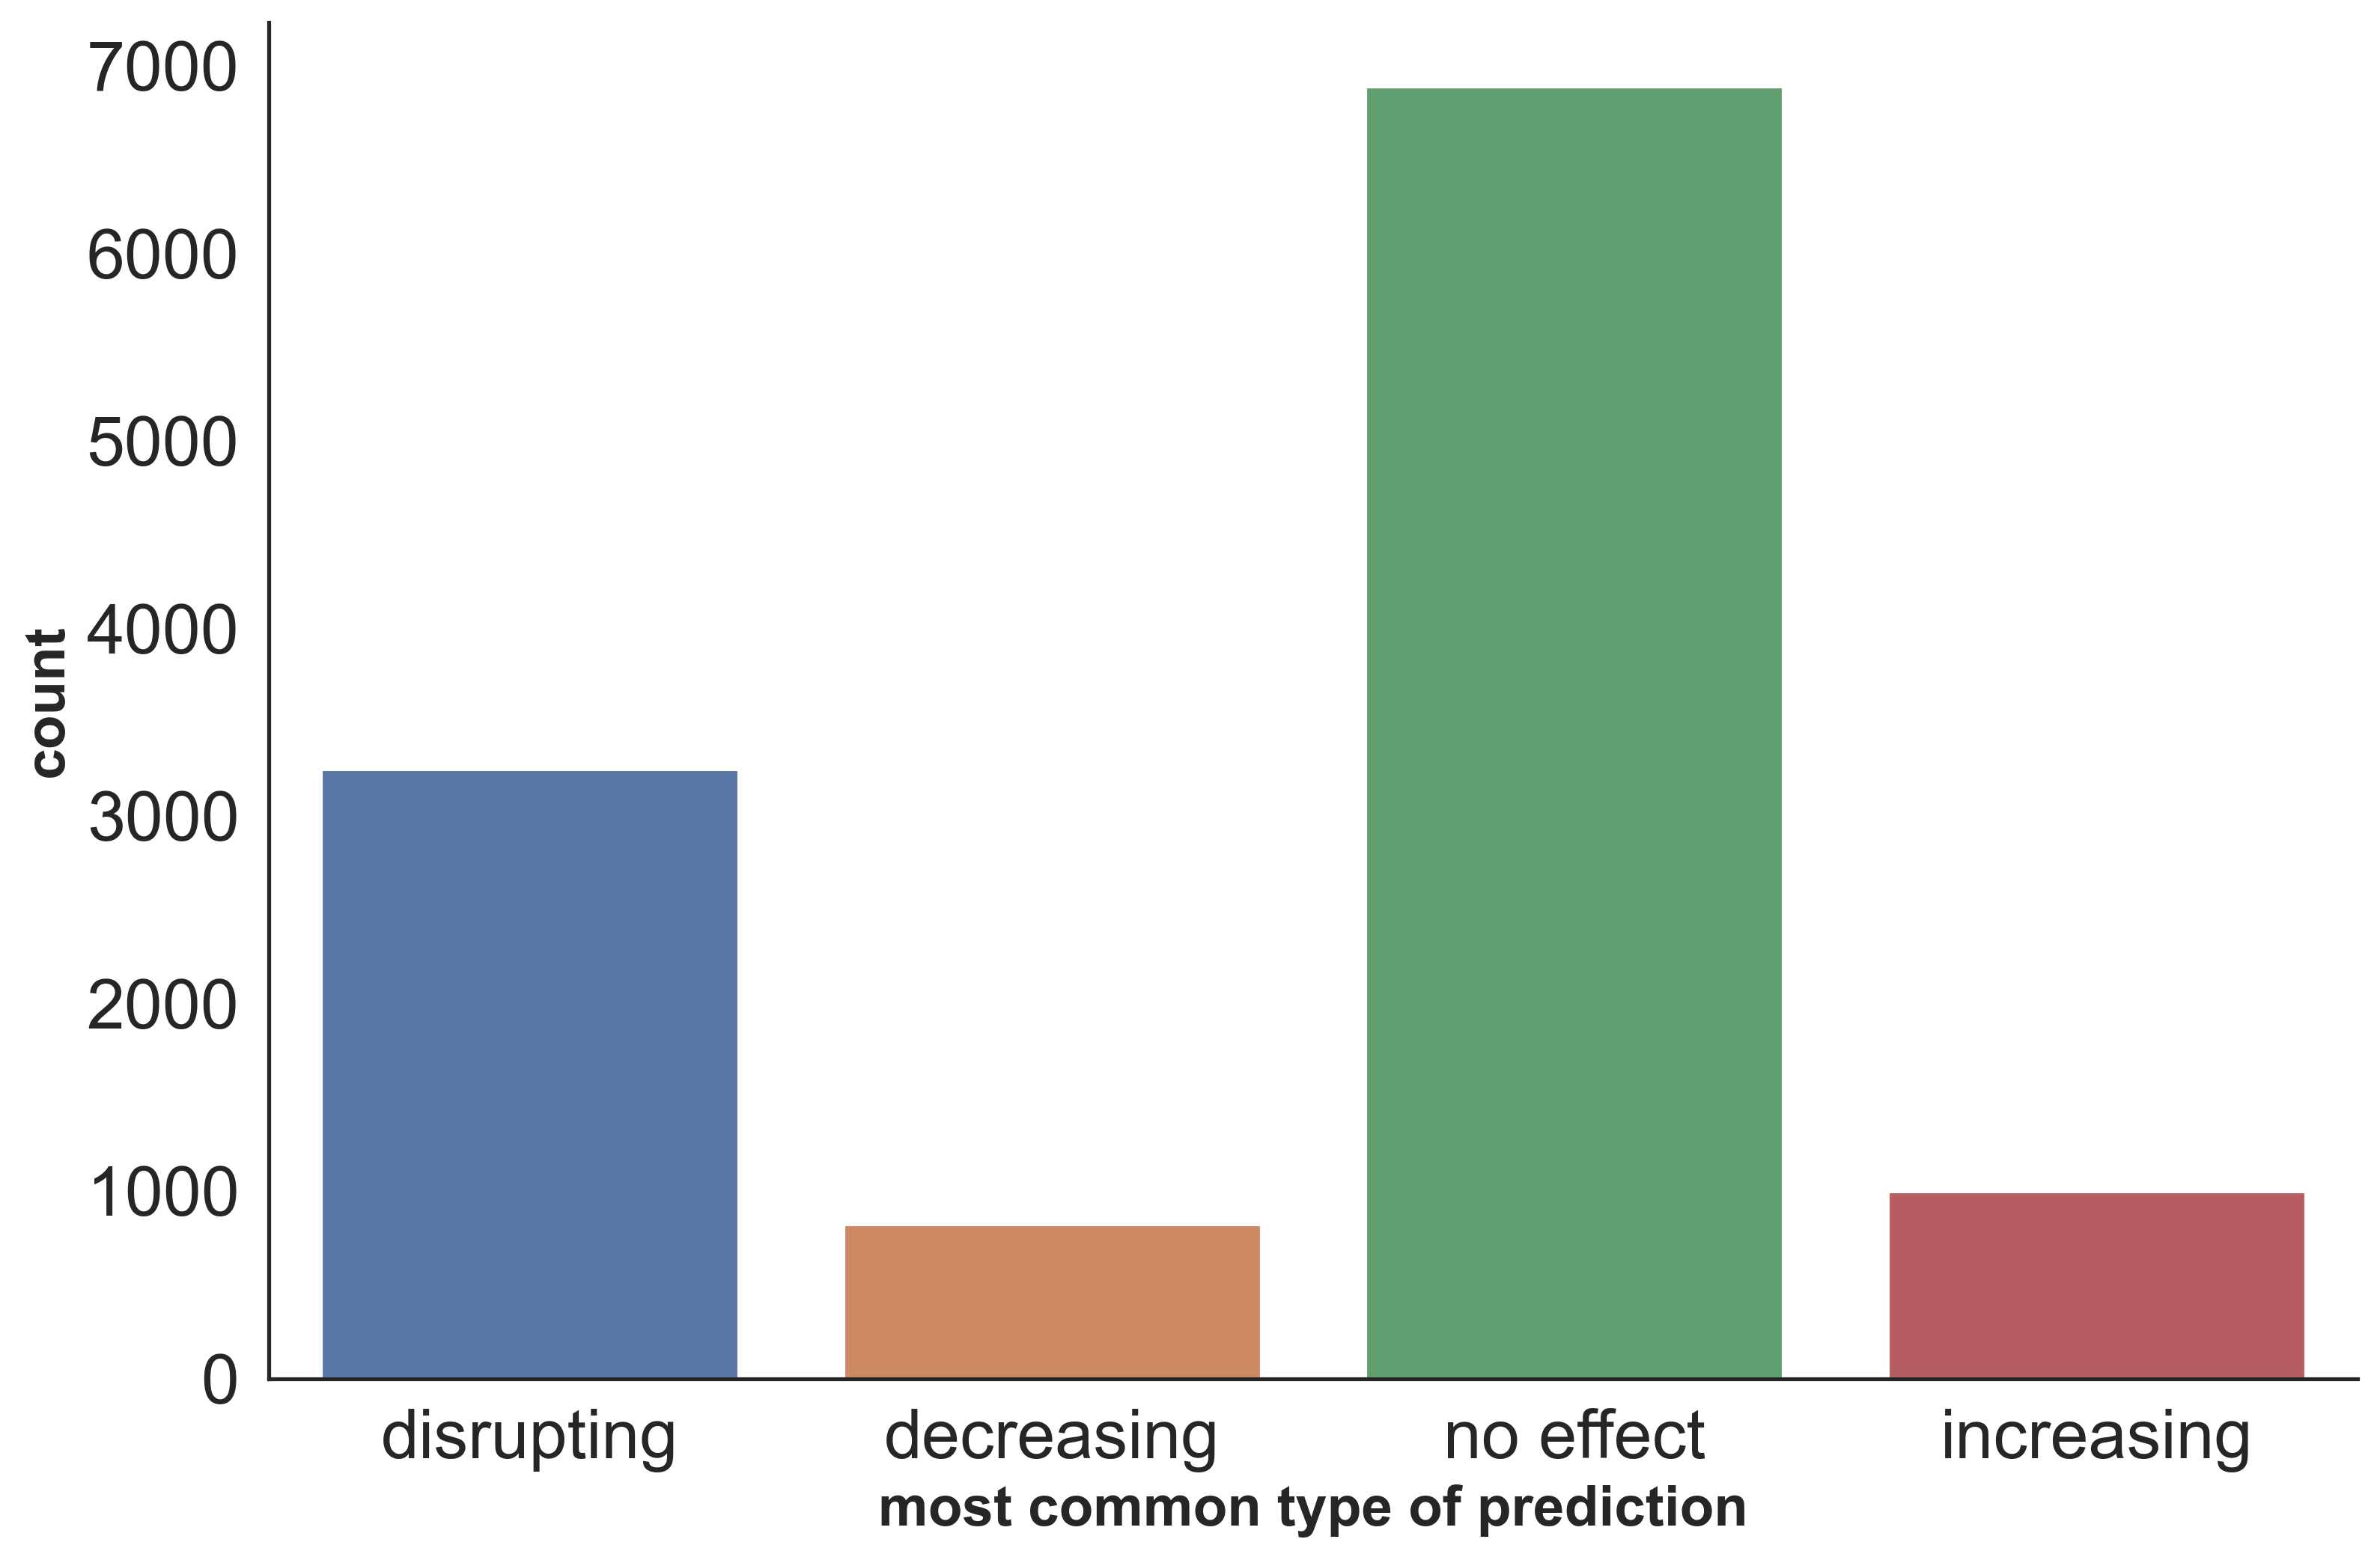

In [116]:
# 总体各类别数量统计
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
sns.set(font_scale=2, style='white')
my_order = ['disrupting', 'decreasing', 'no effect', 'increasing']
sns.countplot(data=master_table, x='pred_most_common_type', ax=ax, order=my_order)
# ax.set(xlabel='most common type of prediction', ylabel='count')
ax.set_xlabel('most common type of prediction', fontsize=18, fontweight='bold')
ax.set_ylabel('count', fontsize=18, fontweight='bold')
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


png1 = io.BytesIO()
plt.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)

# Save as TIFF
png2.save("../data/psymukb/after_predict/pred_type_count_nomixhealthy.tiff", dpi=png2.info['dpi'])
png1.close()

In [117]:
group1 = [3015, 742, 6244, 916]
group2 = [235, 80, 645, 80]
group_name = ['disrupting', 'decreasing', 'no effect', 'increasing']
adjust_cof = len(group1) * (len(group1) - 1) / 2
for i in range(len(group1) - 1):
    for j in range(i + 1, len(group1)):
        odds, p = stats.fisher_exact([[group1[i], group2[i]], [group1[j], group2[j]]])
        print('{} and {}, OR: {:.3f}, p-value: {:.5f}'.format(group_name[i], group_name[j], odds, p * adjust_cof))
# stats.fisher_exact([[3015, 235], [916, 80]])

disrupting and decreasing, OR: 1.383, p-value: 0.11544
disrupting and no effect, OR: 1.325, p-value: 0.00196
disrupting and increasing, OR: 1.121, p-value: 2.44252
decreasing and no effect, OR: 0.958, p-value: 4.22919
decreasing and increasing, OR: 0.810, p-value: 1.27661
no effect and increasing, OR: 0.845, p-value: 1.17957


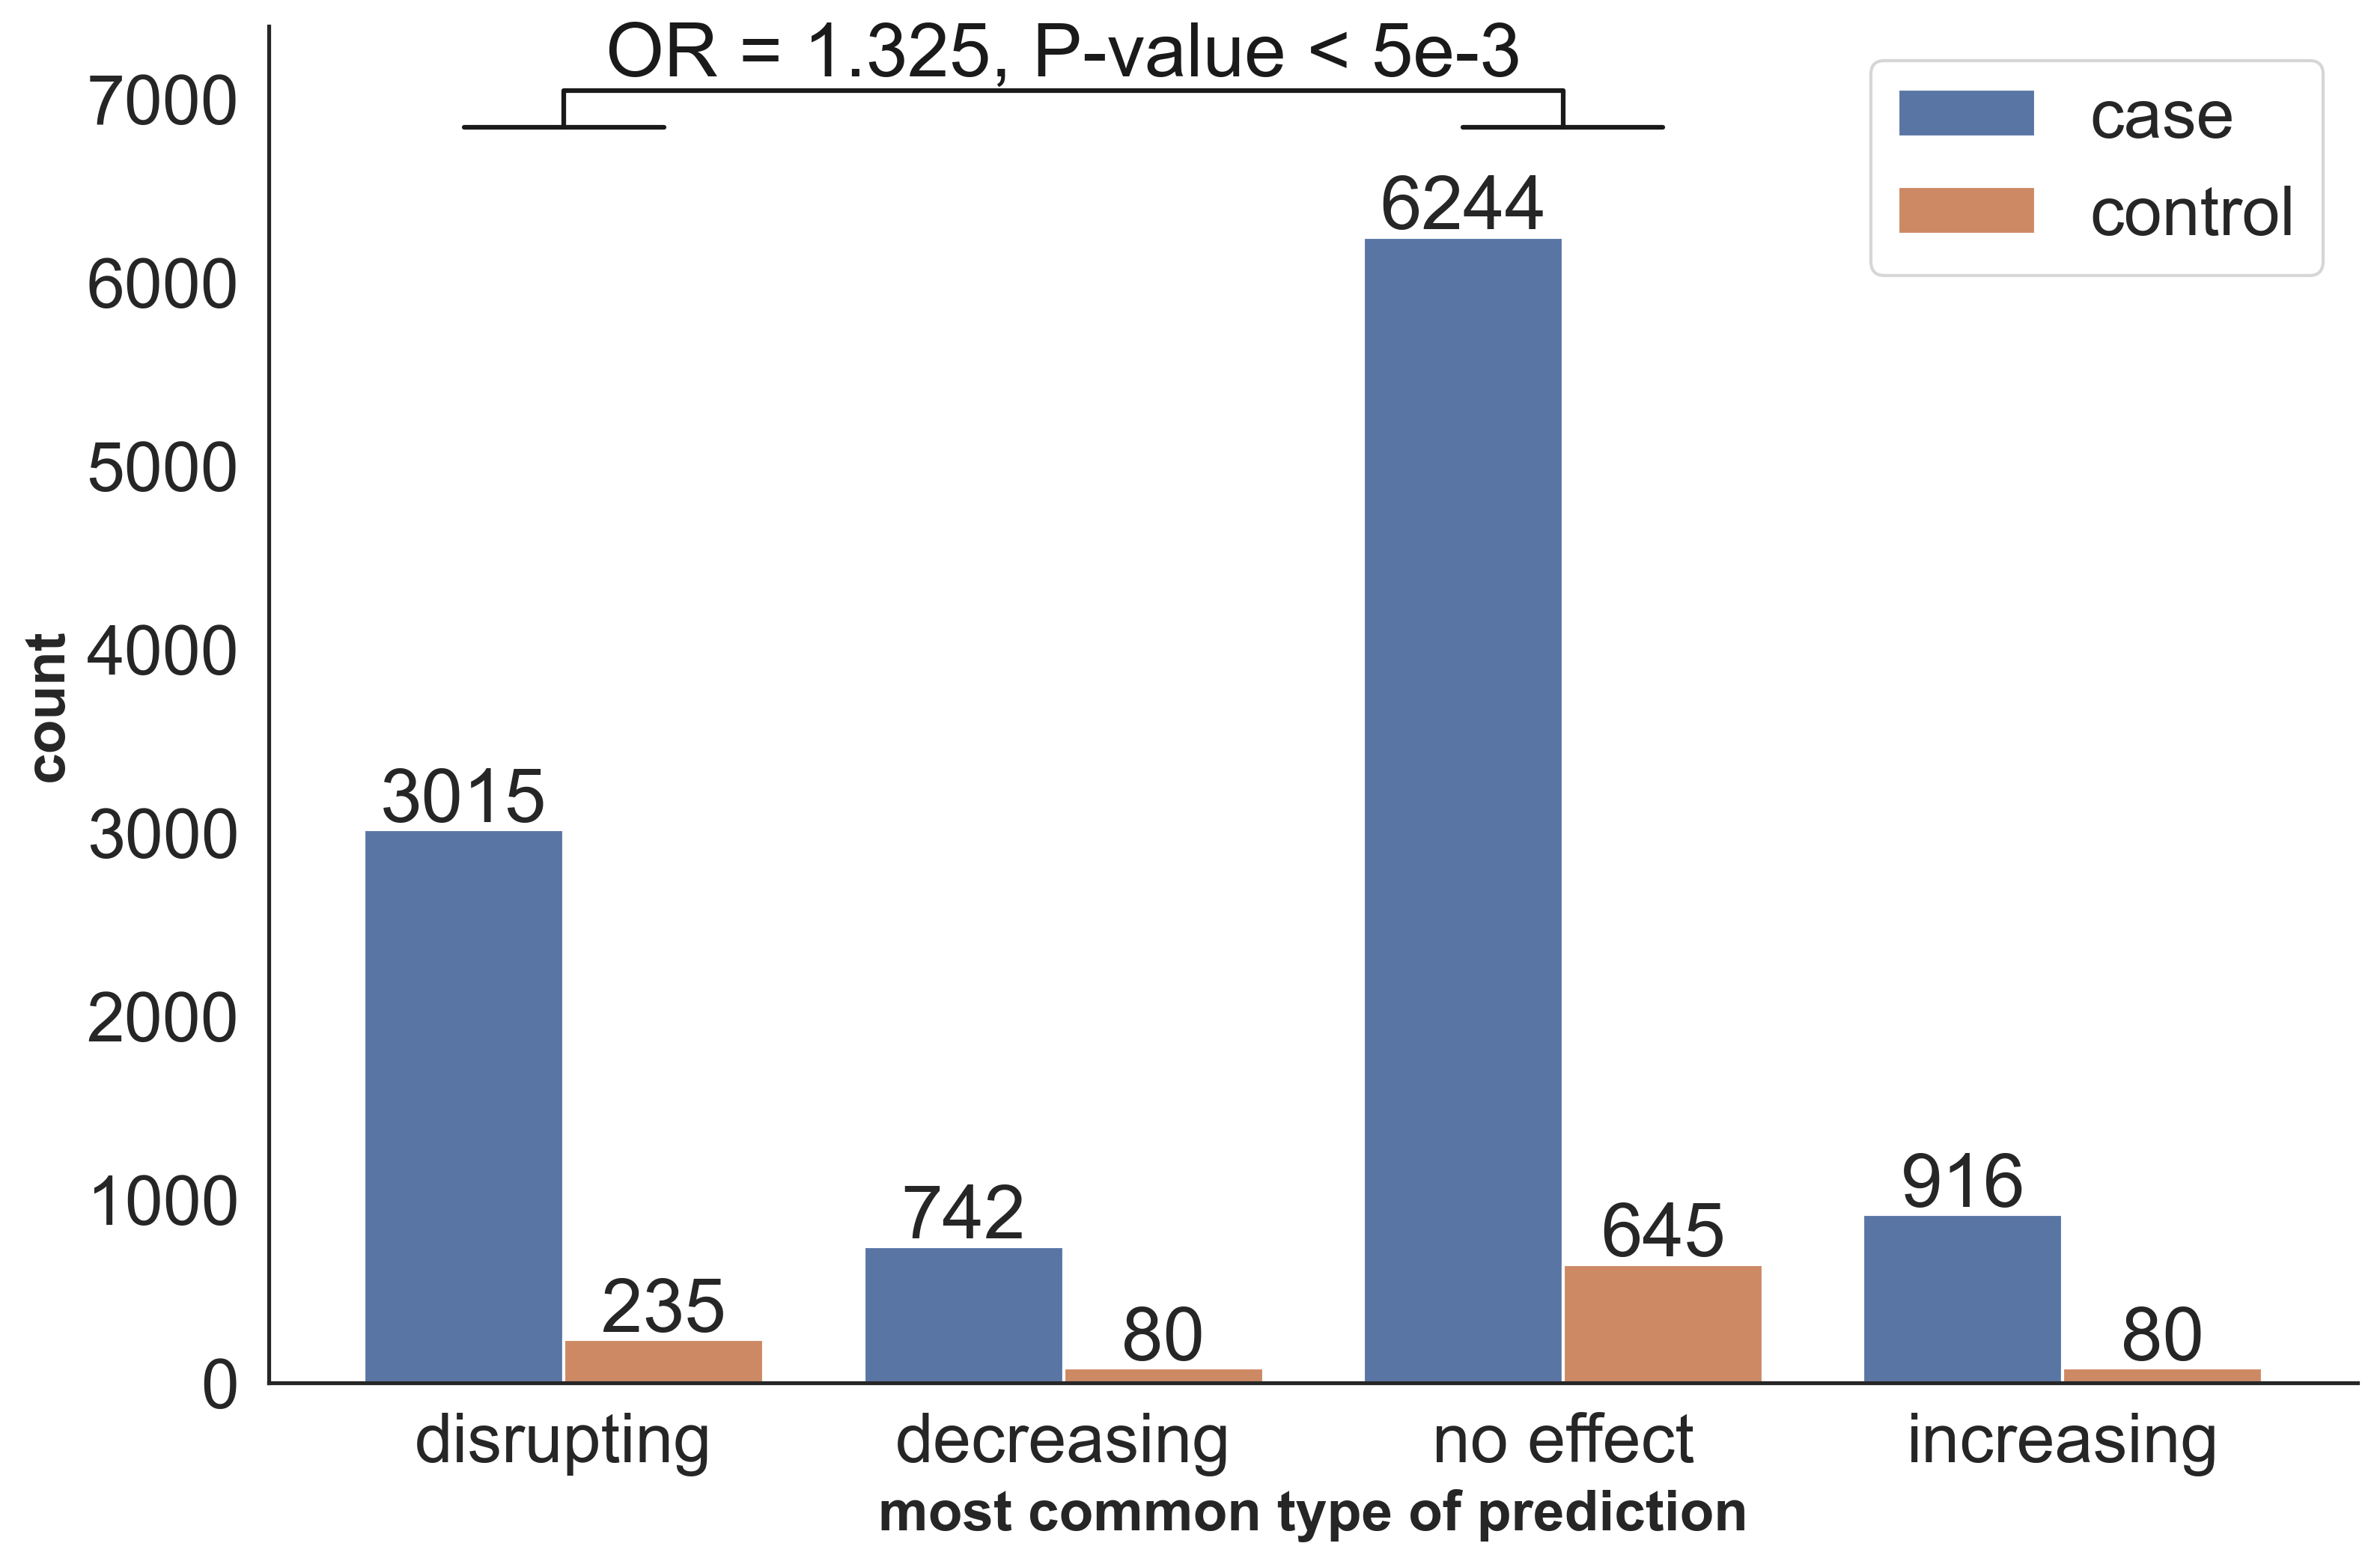

In [119]:

fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
sns.set(font_scale=2, style='white')
my_order = ['disrupting', 'decreasing', 'no effect', 'increasing']
plot = sns.countplot(data=master_table, x='pred_most_common_type', ax=ax, order=my_order, hue='sample_type')
# plt.rcParams["axes.labelsize"] = 12

for p in plot.patches:
    plot.annotate(p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set_xlabel('most common type of prediction', fontsize=18, fontweight='bold')
ax.set_ylabel('count', fontsize=18, fontweight='bold')

# statistical annotation
x1, x2 = 0, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 6244 + 600, 200, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.plot([x1 - 0.2, x1 + 0.2], [y, y], lw=1.5, c=col)
plt.plot([x2 - 0.2, x2 + 0.2], [y, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "OR = 1.325, P-value < 5e-3", ha='center', va='bottom', color=col)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend().set_title('')

png1 = io.BytesIO()
plt.savefig(png1, format="png")
# Load this image into PIL
png2 = Image.open(png1)
# Save as TIFF
png2.save("../data/psymukb/after_predict/pred_type_case_control_count_nomixhealthy.tiff", dpi=png2.info['dpi'])
png1.close()

#### distribution above didn't show difference with significance. chi-square p-value = 0.0726, fisher test p-value = 0.071 (based on 1e7 replicates)  WITHOUT mix healthy, fisher_p_value 0.002029, chi-square_p_value 0.002515

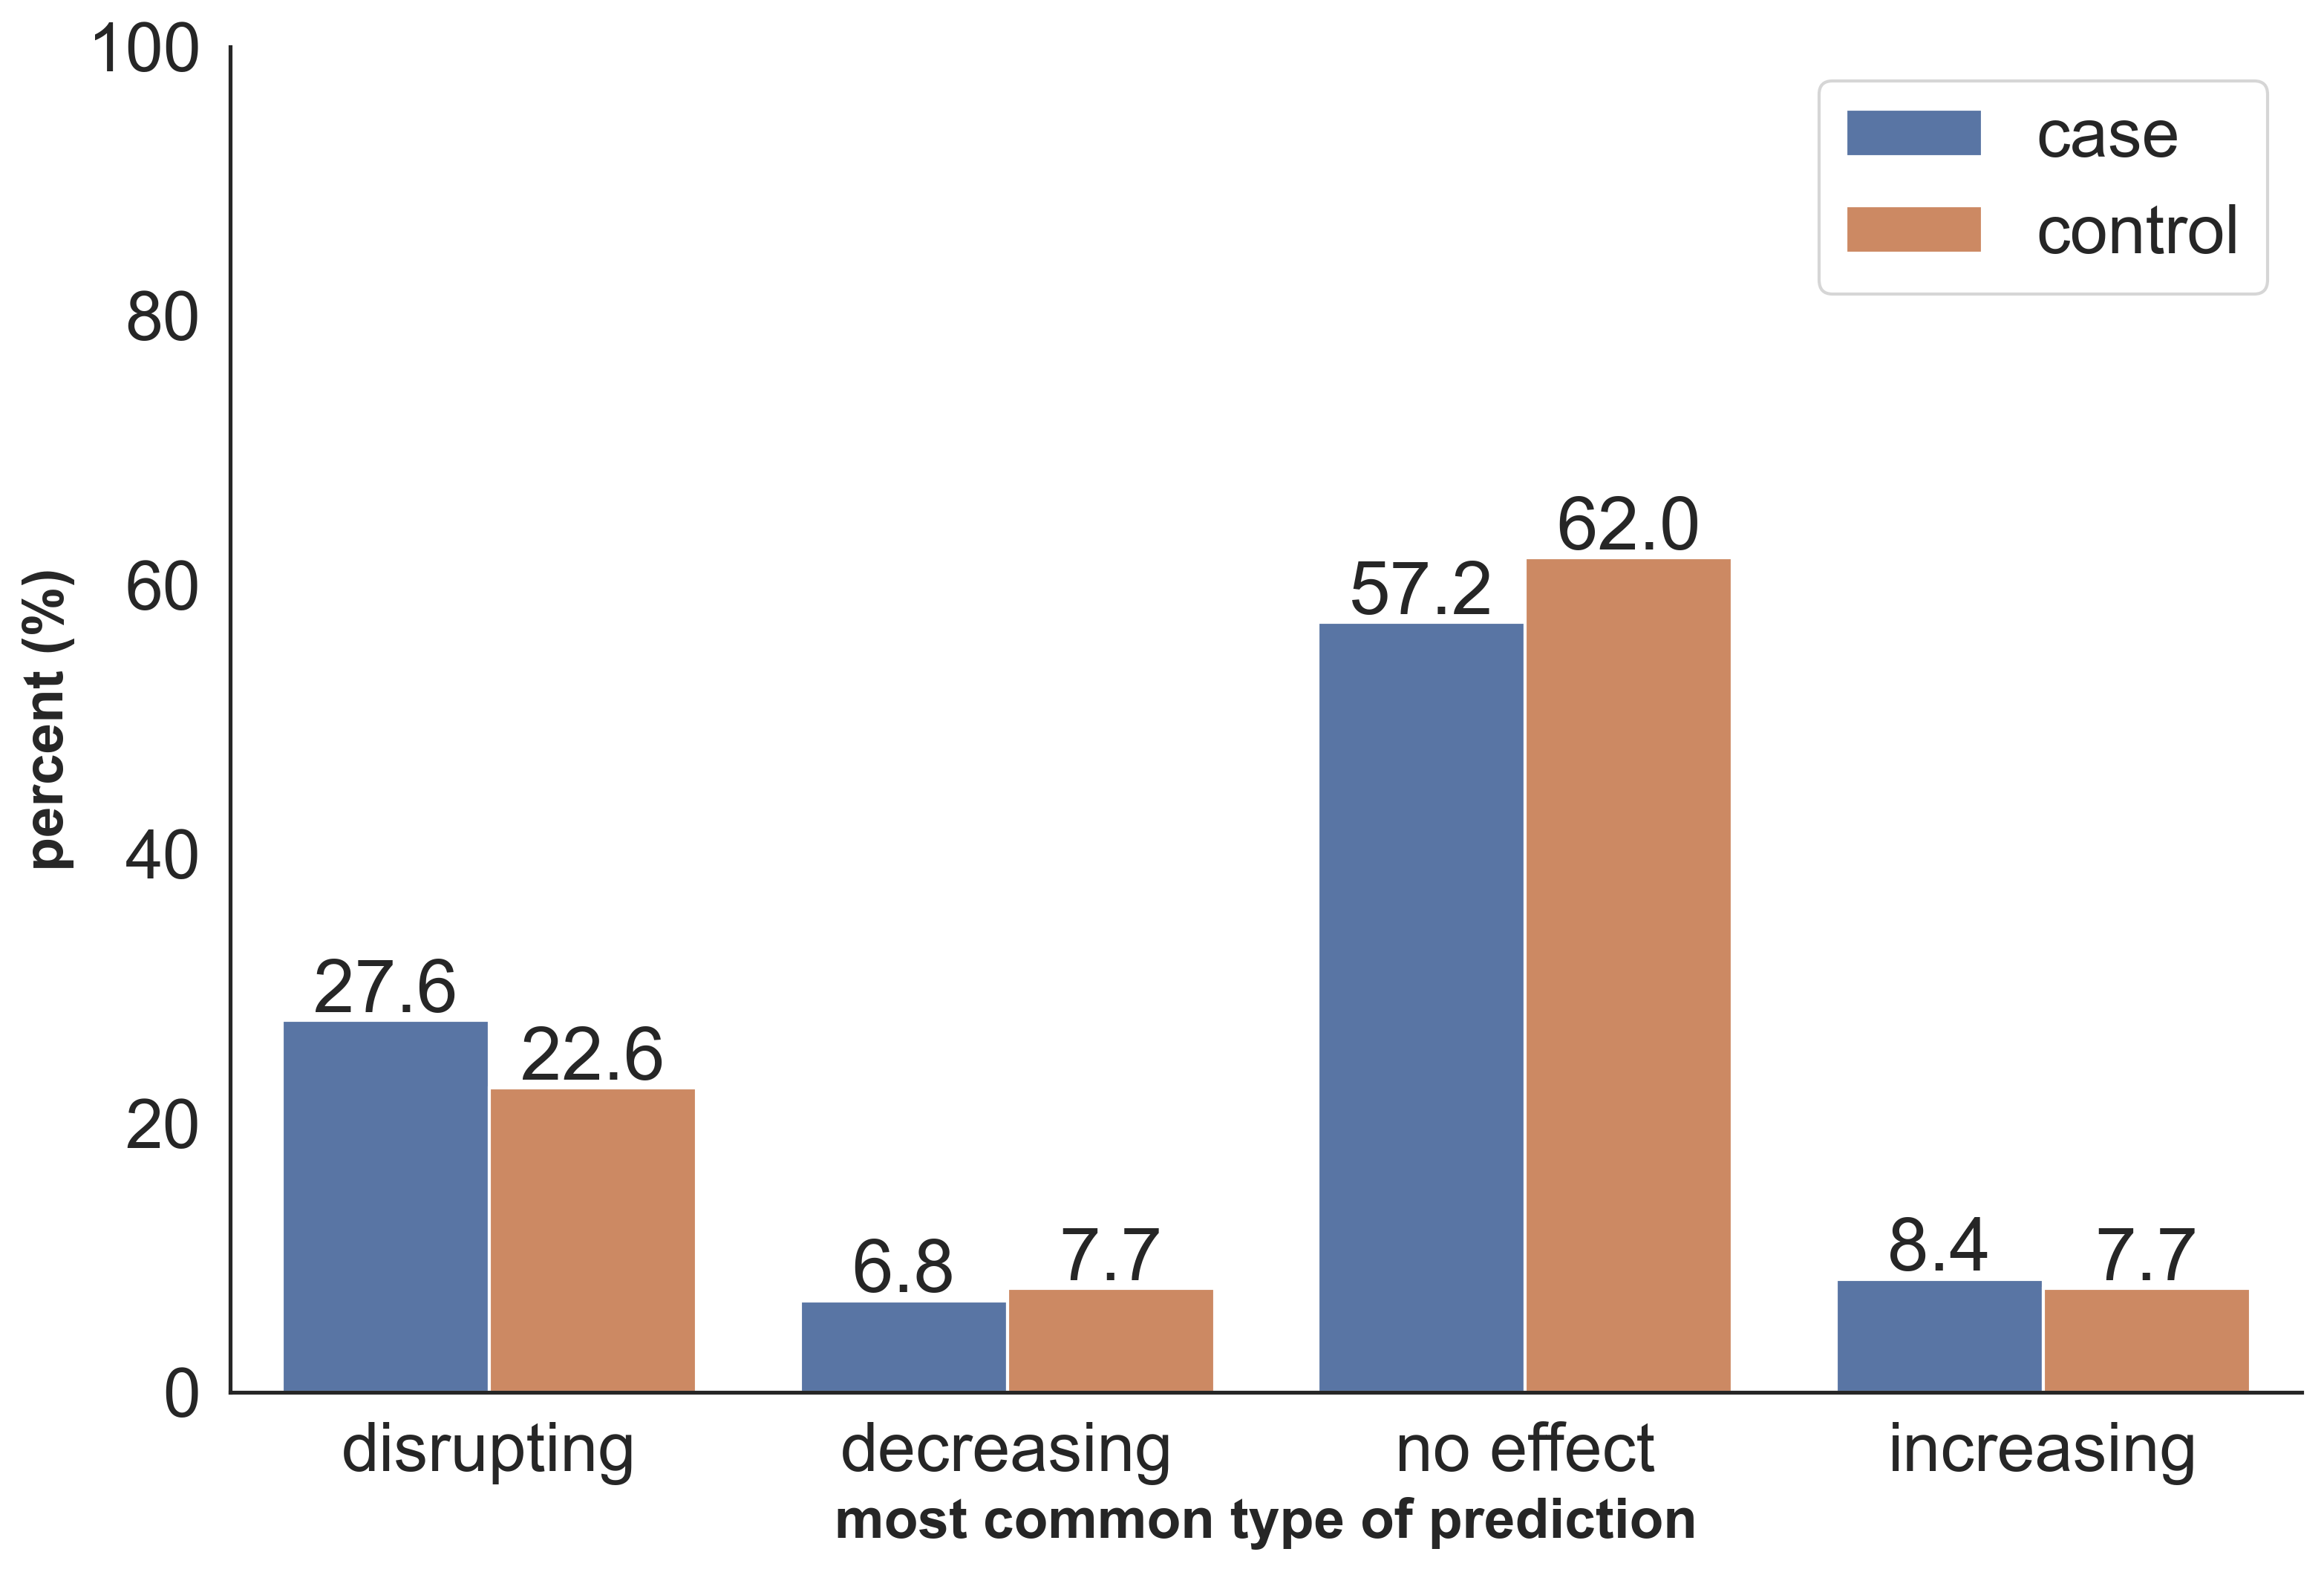

In [245]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
sns.set(font_scale=2, style='white')
my_order = ['disrupting', 'decreasing', 'no effect', 'increasing']
x, y = 'pred_most_common_type', 'sample_type'
df_1 = master_table.groupby(y)[x].value_counts(normalize=True)
df_1 = df_1.mul(100)
df_1 = df_1.rename('percent').reset_index()

plot = sns.barplot(x=x, y='percent', hue=y, data=df_1, order=my_order)
plot.set_ylim(0, 100)
# plot = sns.countplot(data=master_table, x='pred_most_common_type', ax=ax, order=my_order, hue='sample_type')
# plt.rcParams["axes.labelsize"] = 12

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set_xlabel('most common type of prediction', fontsize=18, fontweight='bold')
ax.set_ylabel('percent (%)', fontsize=18, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend().set_title('')

png1 = io.BytesIO()
plt.savefig(png1, format="png")
# Load this image into PIL
png2 = Image.open(png1)
# Save as TIFF
png2.save("../data/psymukb/after_predict/pred_type_case_control_percent_nomixhealthy.tiff", dpi=png2.info['dpi'])
png1.close()

In [145]:
df_1

pred_most_common_type sample_type    percent
0            decreasing        case  78.768577
1            decreasing     control  21.231423
2            disrupting        case  80.983078
3            disrupting     control  19.016922
4            increasing        case  79.930192
5            increasing     control  20.069808
6             no effect        case  78.938053
7             no effect     control  21.061947

In [108]:
# plt.figure(figsize=(20, 10))
master_table.groupby(by=['PrimaryPhenotype'])['pred_most_common'].value_counts(sort=False)

PrimaryPhenotype                         pred_most_common
Amyotrophic Lateral Sclerosis (ALS)      0                     12
                                         1                      5
                                         2                     31
                                         3                      6
Anophthalmia and Microphthalmia (A/M)    0                      1
                                                             ... 
Tourette Disorder (TD)                   3                     14
Uncharacterized (Mixed healthy control)  0                    473
                                         1                    120
                                         2                   1021
                                         3                    150
Name: pred_most_common, Length: 105, dtype: int64

In [109]:
import seaborn as sns

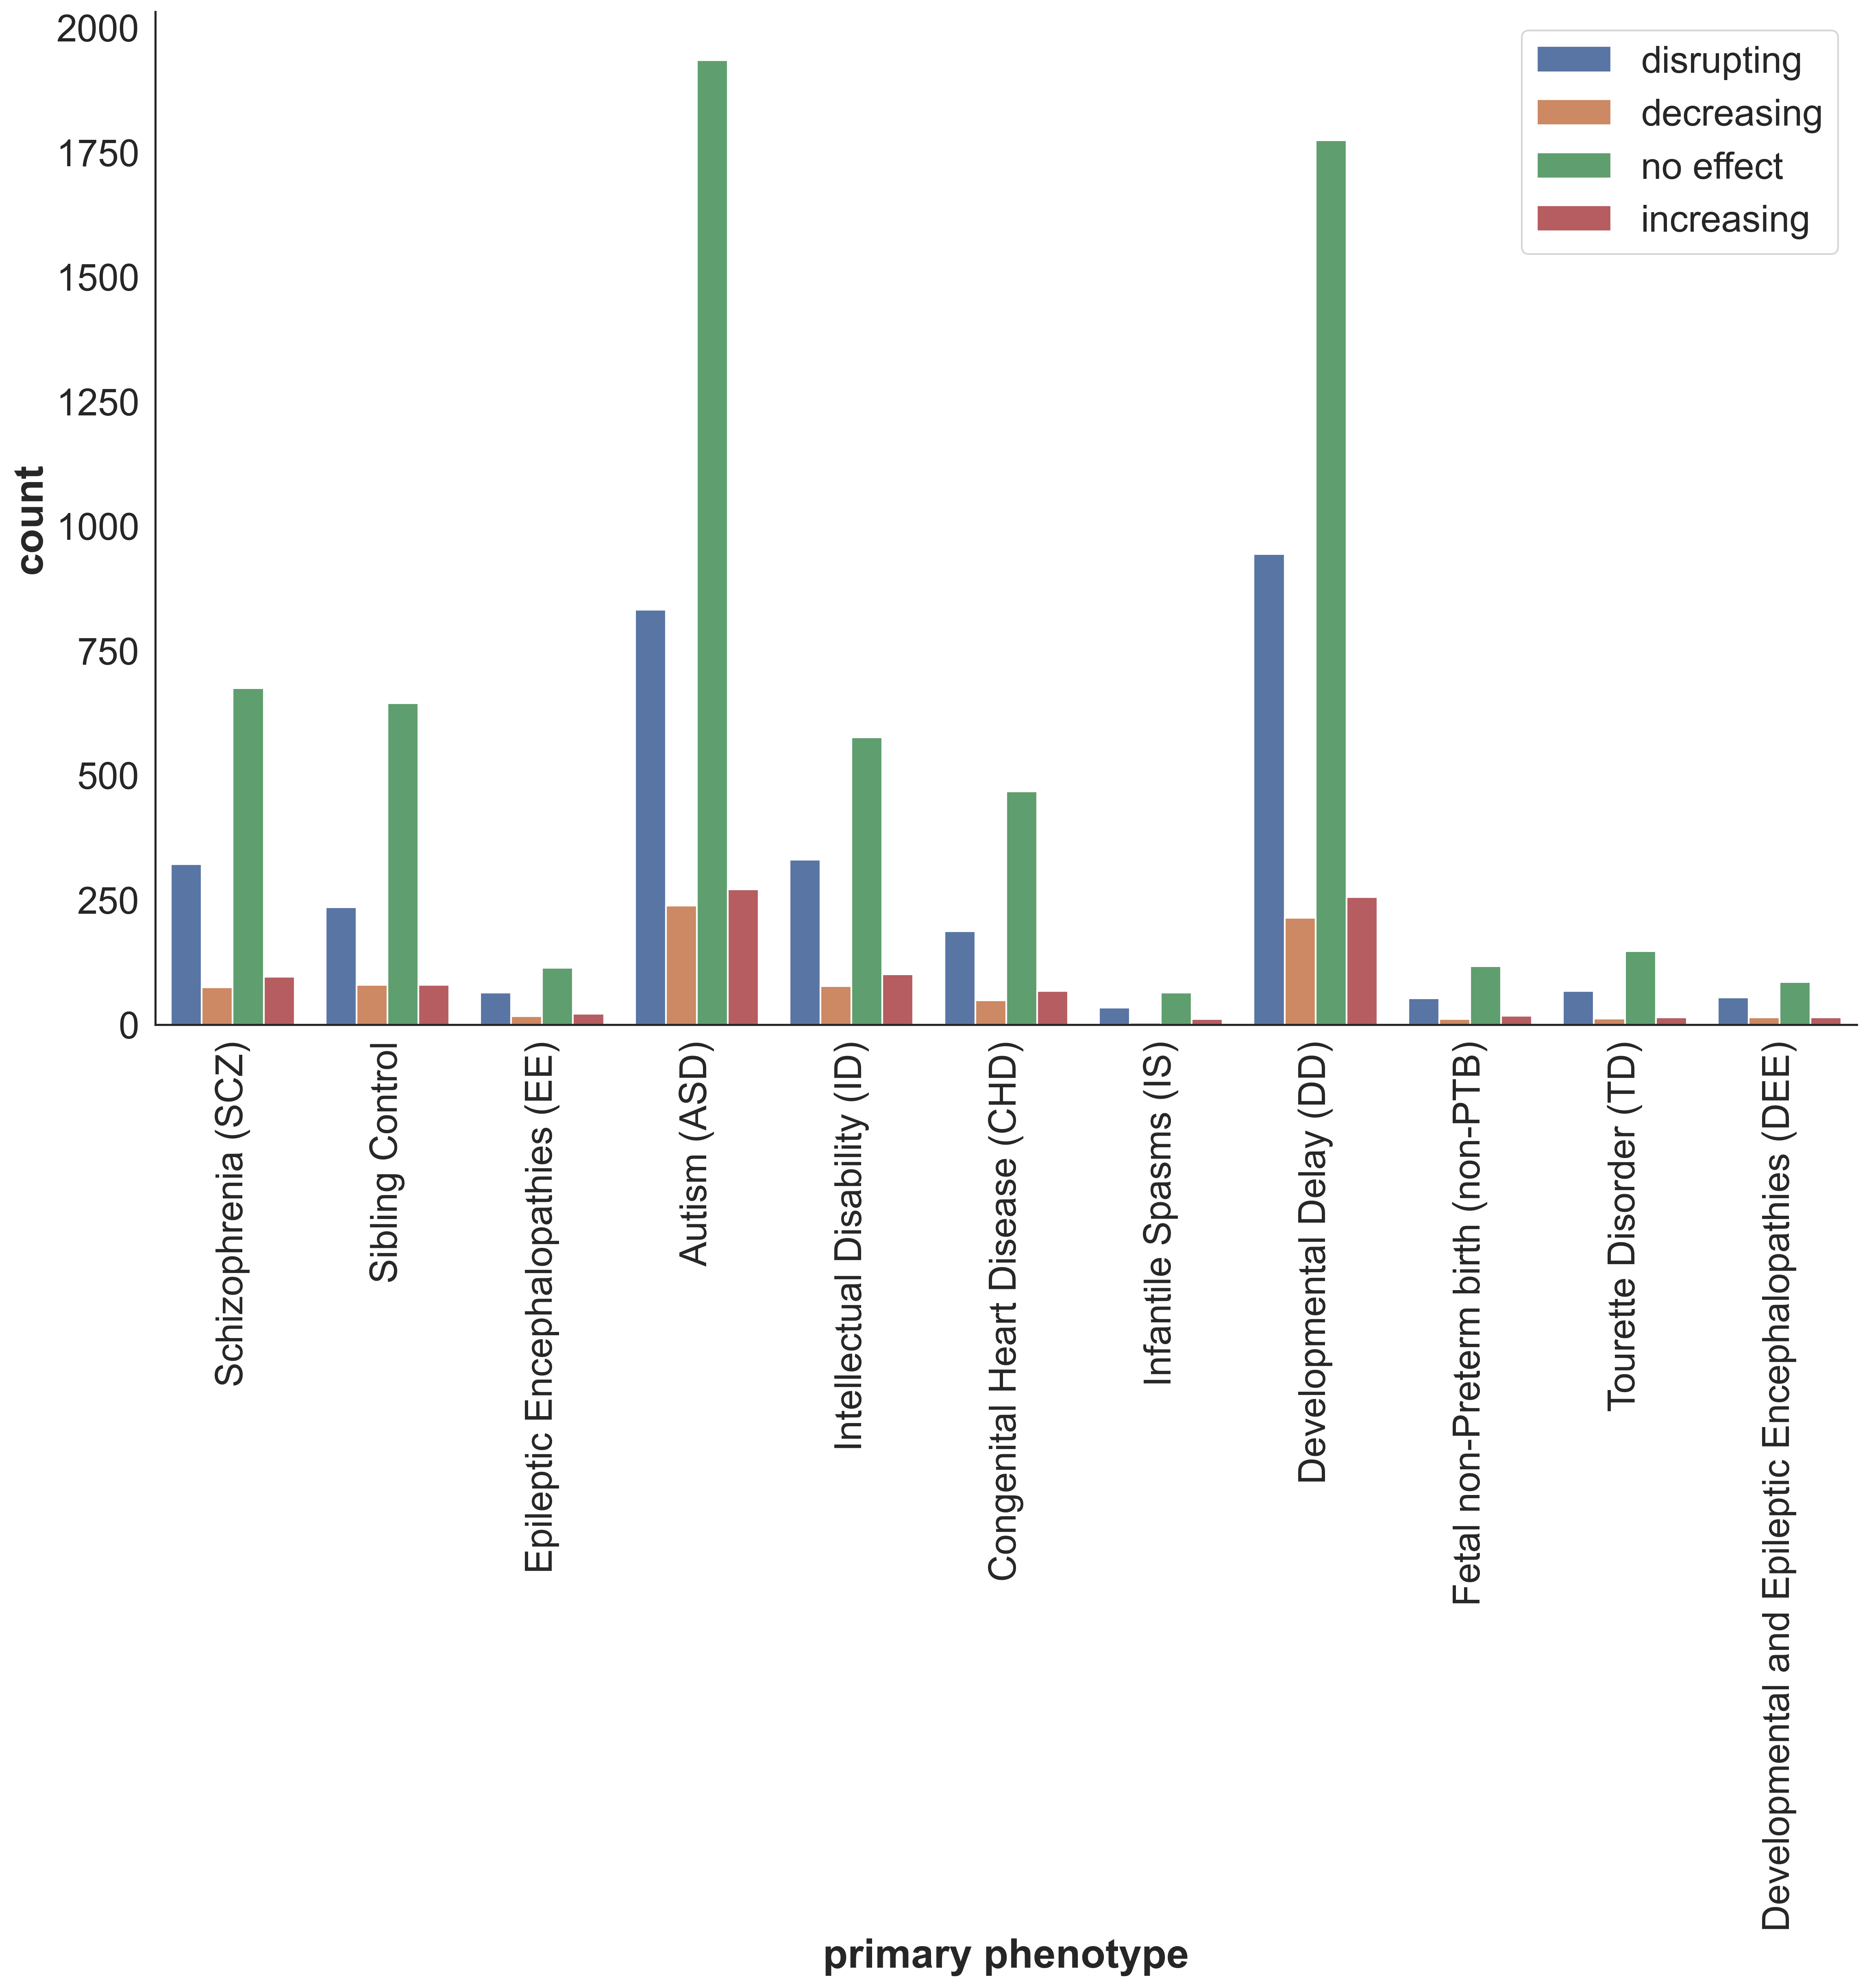

In [246]:
sns.set(font_scale=2, style='white')
fig, ax = plt.subplots(figsize=(18, 11), dpi=300)
hue_order = ['disrupting', 'decreasing', 'no effect', 'increasing']
df_1 = master_table.groupby('PrimaryPhenotype').filter(lambda x: len(x) > 100)
test_plot = sns.countplot(data=df_1, x='PrimaryPhenotype', hue='pred_most_common_type', ax=ax, hue_order=hue_order)
for item in test_plot.get_xticklabels():
    item.set_rotation(90)

ax.set_xlabel('primary phenotype', fontsize=24, fontweight='bold')
ax.set_ylabel('count', fontsize=24, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend().set_title('')
# plt.tight_layout()

test_plot.figure.savefig("../data/psymukb/after_predict/pred_type_disease_count100_nomixhealthy.tiff", dpi=300, bbox_inches='tight')


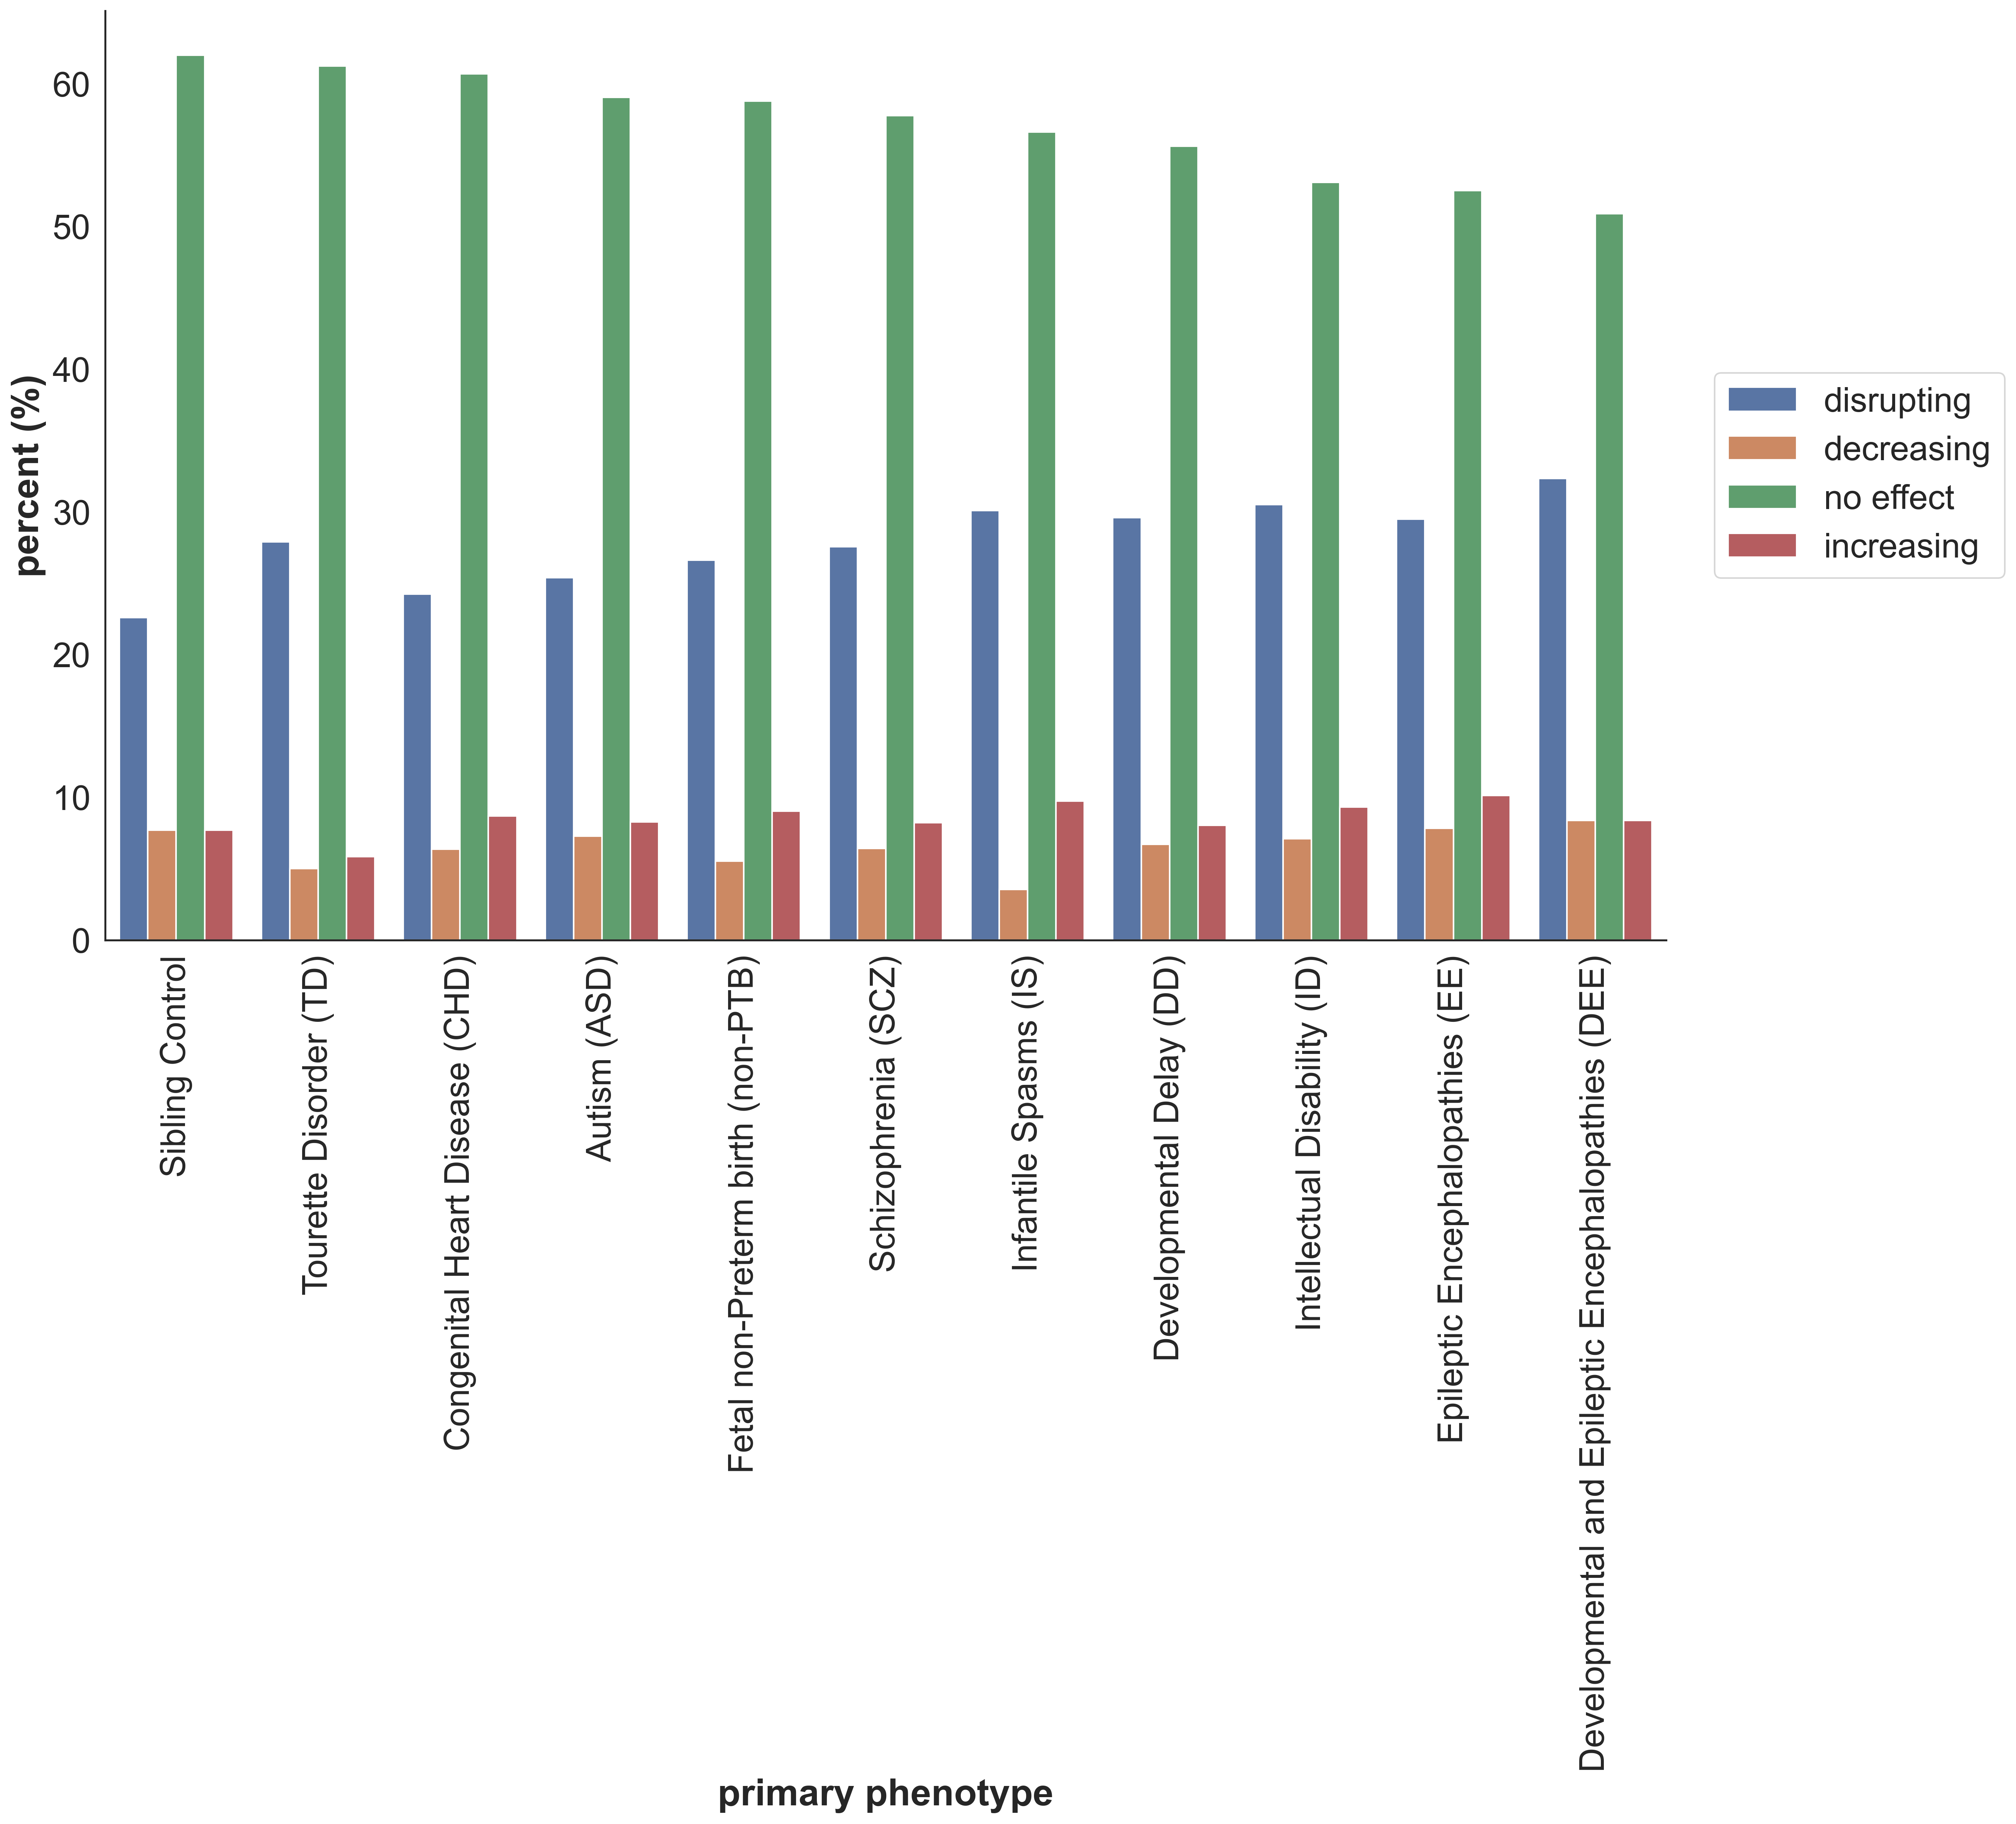

In [247]:
sns.set(font_scale=2, style='white')
fig, ax = plt.subplots(figsize=(18, 11), dpi=300)
hue_order = ['disrupting', 'decreasing', 'no effect', 'increasing']
x, y = 'PrimaryPhenotype', 'pred_most_common_type'
df_2 = master_table.groupby('PrimaryPhenotype').filter(lambda x: len(x) > 100)
df_1 = df_2.groupby(x)[y].value_counts(normalize=True)
df_1 = df_1.mul(100)
df_1 = df_1.rename('percent').reset_index()
df_1 = df_1.sort_values(['percent'], ascending=False).reset_index(drop=True)

test_plot = sns.barplot(data=df_1, x=x, y='percent', hue=y, ax=ax, hue_order=hue_order)
for item in test_plot.get_xticklabels():
    item.set_rotation(90)

ax.set_xlabel('primary phenotype', fontsize=24, fontweight='bold')
ax.set_ylabel('percent (%)', fontsize=24, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1).set_title('')
# plt.legend(loc='upper right')
# plt.tight_layout()

test_plot.figure.savefig("../data/psymukb/after_predict/pred_type_disease_percent100_nomixhealthy.tiff", dpi=300, bbox_inches='tight')

# png1 = io.BytesIO()
# plt.savefig(png1, format="png")
# # Load this image into PIL
# png2 = Image.open(png1)
# # Save as TIFF
# png2.save("../data/psymukb/after_predict/pred_type_disease_count.tiff", dpi=png2.info['dpi'])
# png1.close()


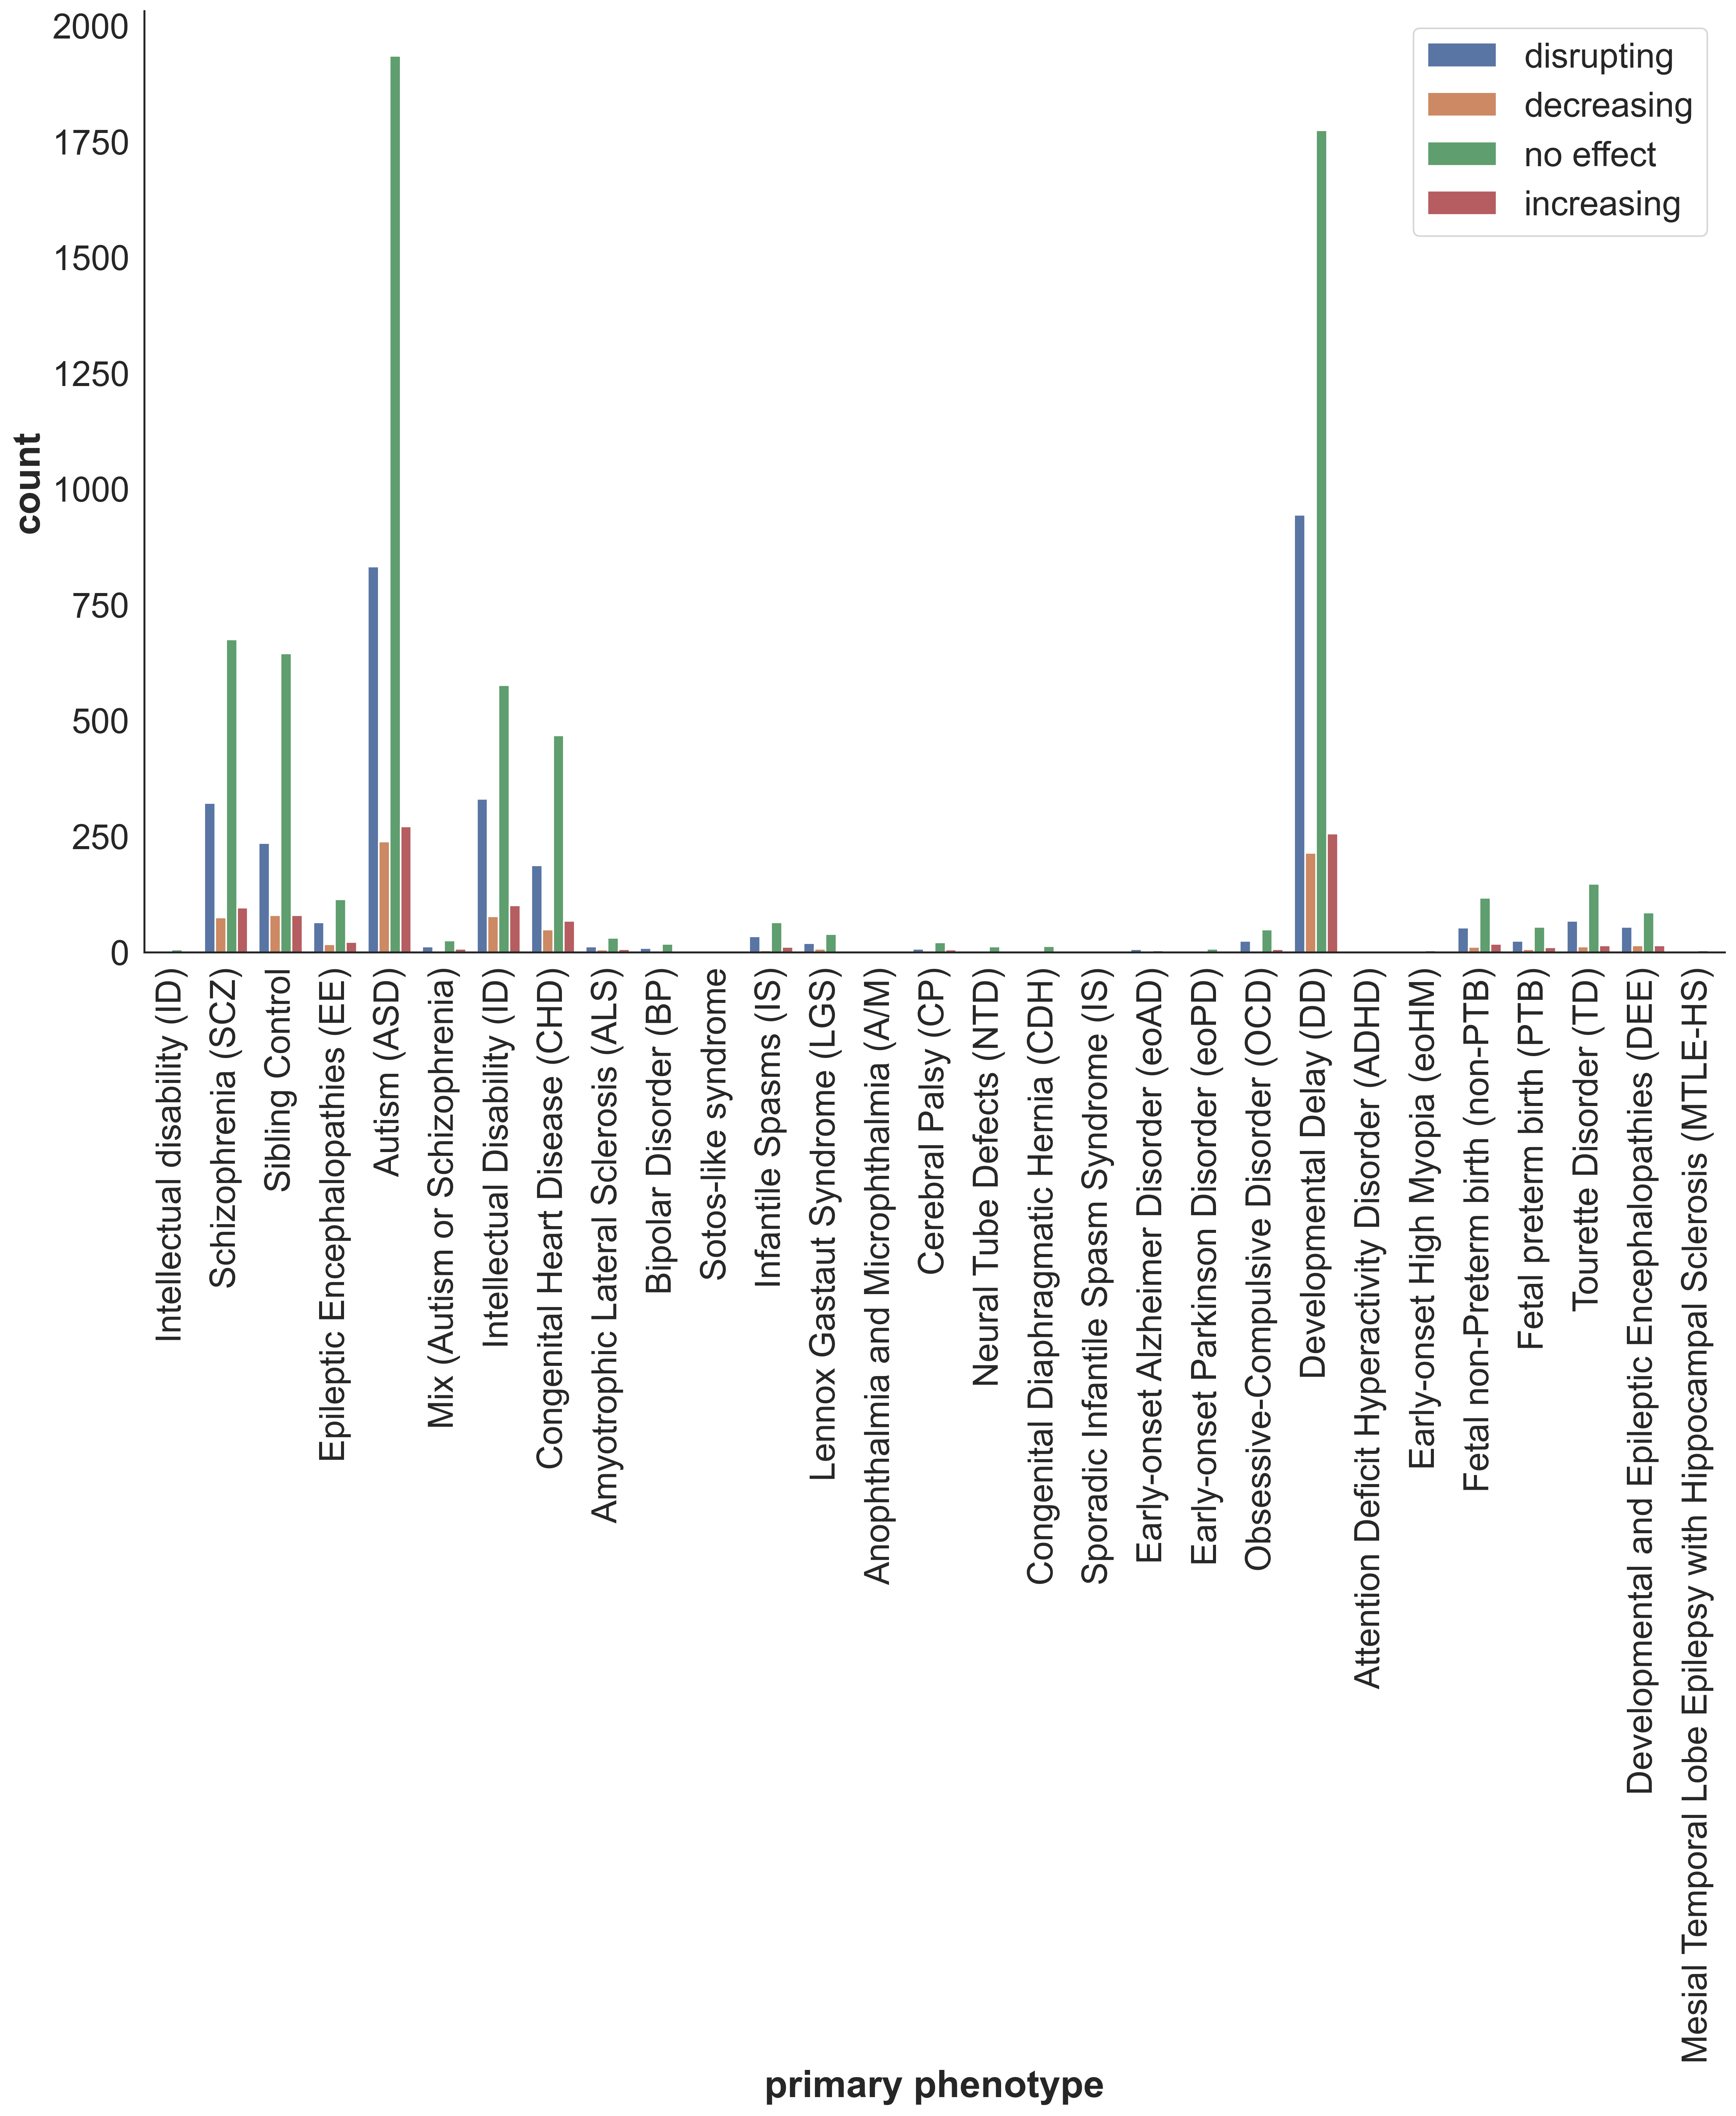

In [248]:
sns.set(font_scale=2, style='white')
fig, ax = plt.subplots(figsize=(18, 11), dpi=300)
hue_order = ['disrupting', 'decreasing', 'no effect', 'increasing']
test_plot = sns.countplot(data=master_table, x='PrimaryPhenotype', hue='pred_most_common_type', ax=ax, hue_order=hue_order)
for item in test_plot.get_xticklabels():
    item.set_rotation(90)

ax.set_xlabel('primary phenotype', fontsize=24, fontweight='bold')
ax.set_ylabel('count', fontsize=24, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend().set_title('')
# plt.tight_layout()

test_plot.figure.savefig("../data/psymukb/after_predict/pred_type_disease_count_nomixhealthy.tiff", dpi=300, bbox_inches='tight')

# png1 = io.BytesIO()
# plt.savefig(png1, format="png")
# # Load this image into PIL
# png2 = Image.open(png1)
# # Save as TIFF
# png2.save("../data/psymukb/after_predict/pred_type_disease_count.tiff", dpi=png2.info['dpi'])
# png1.close()


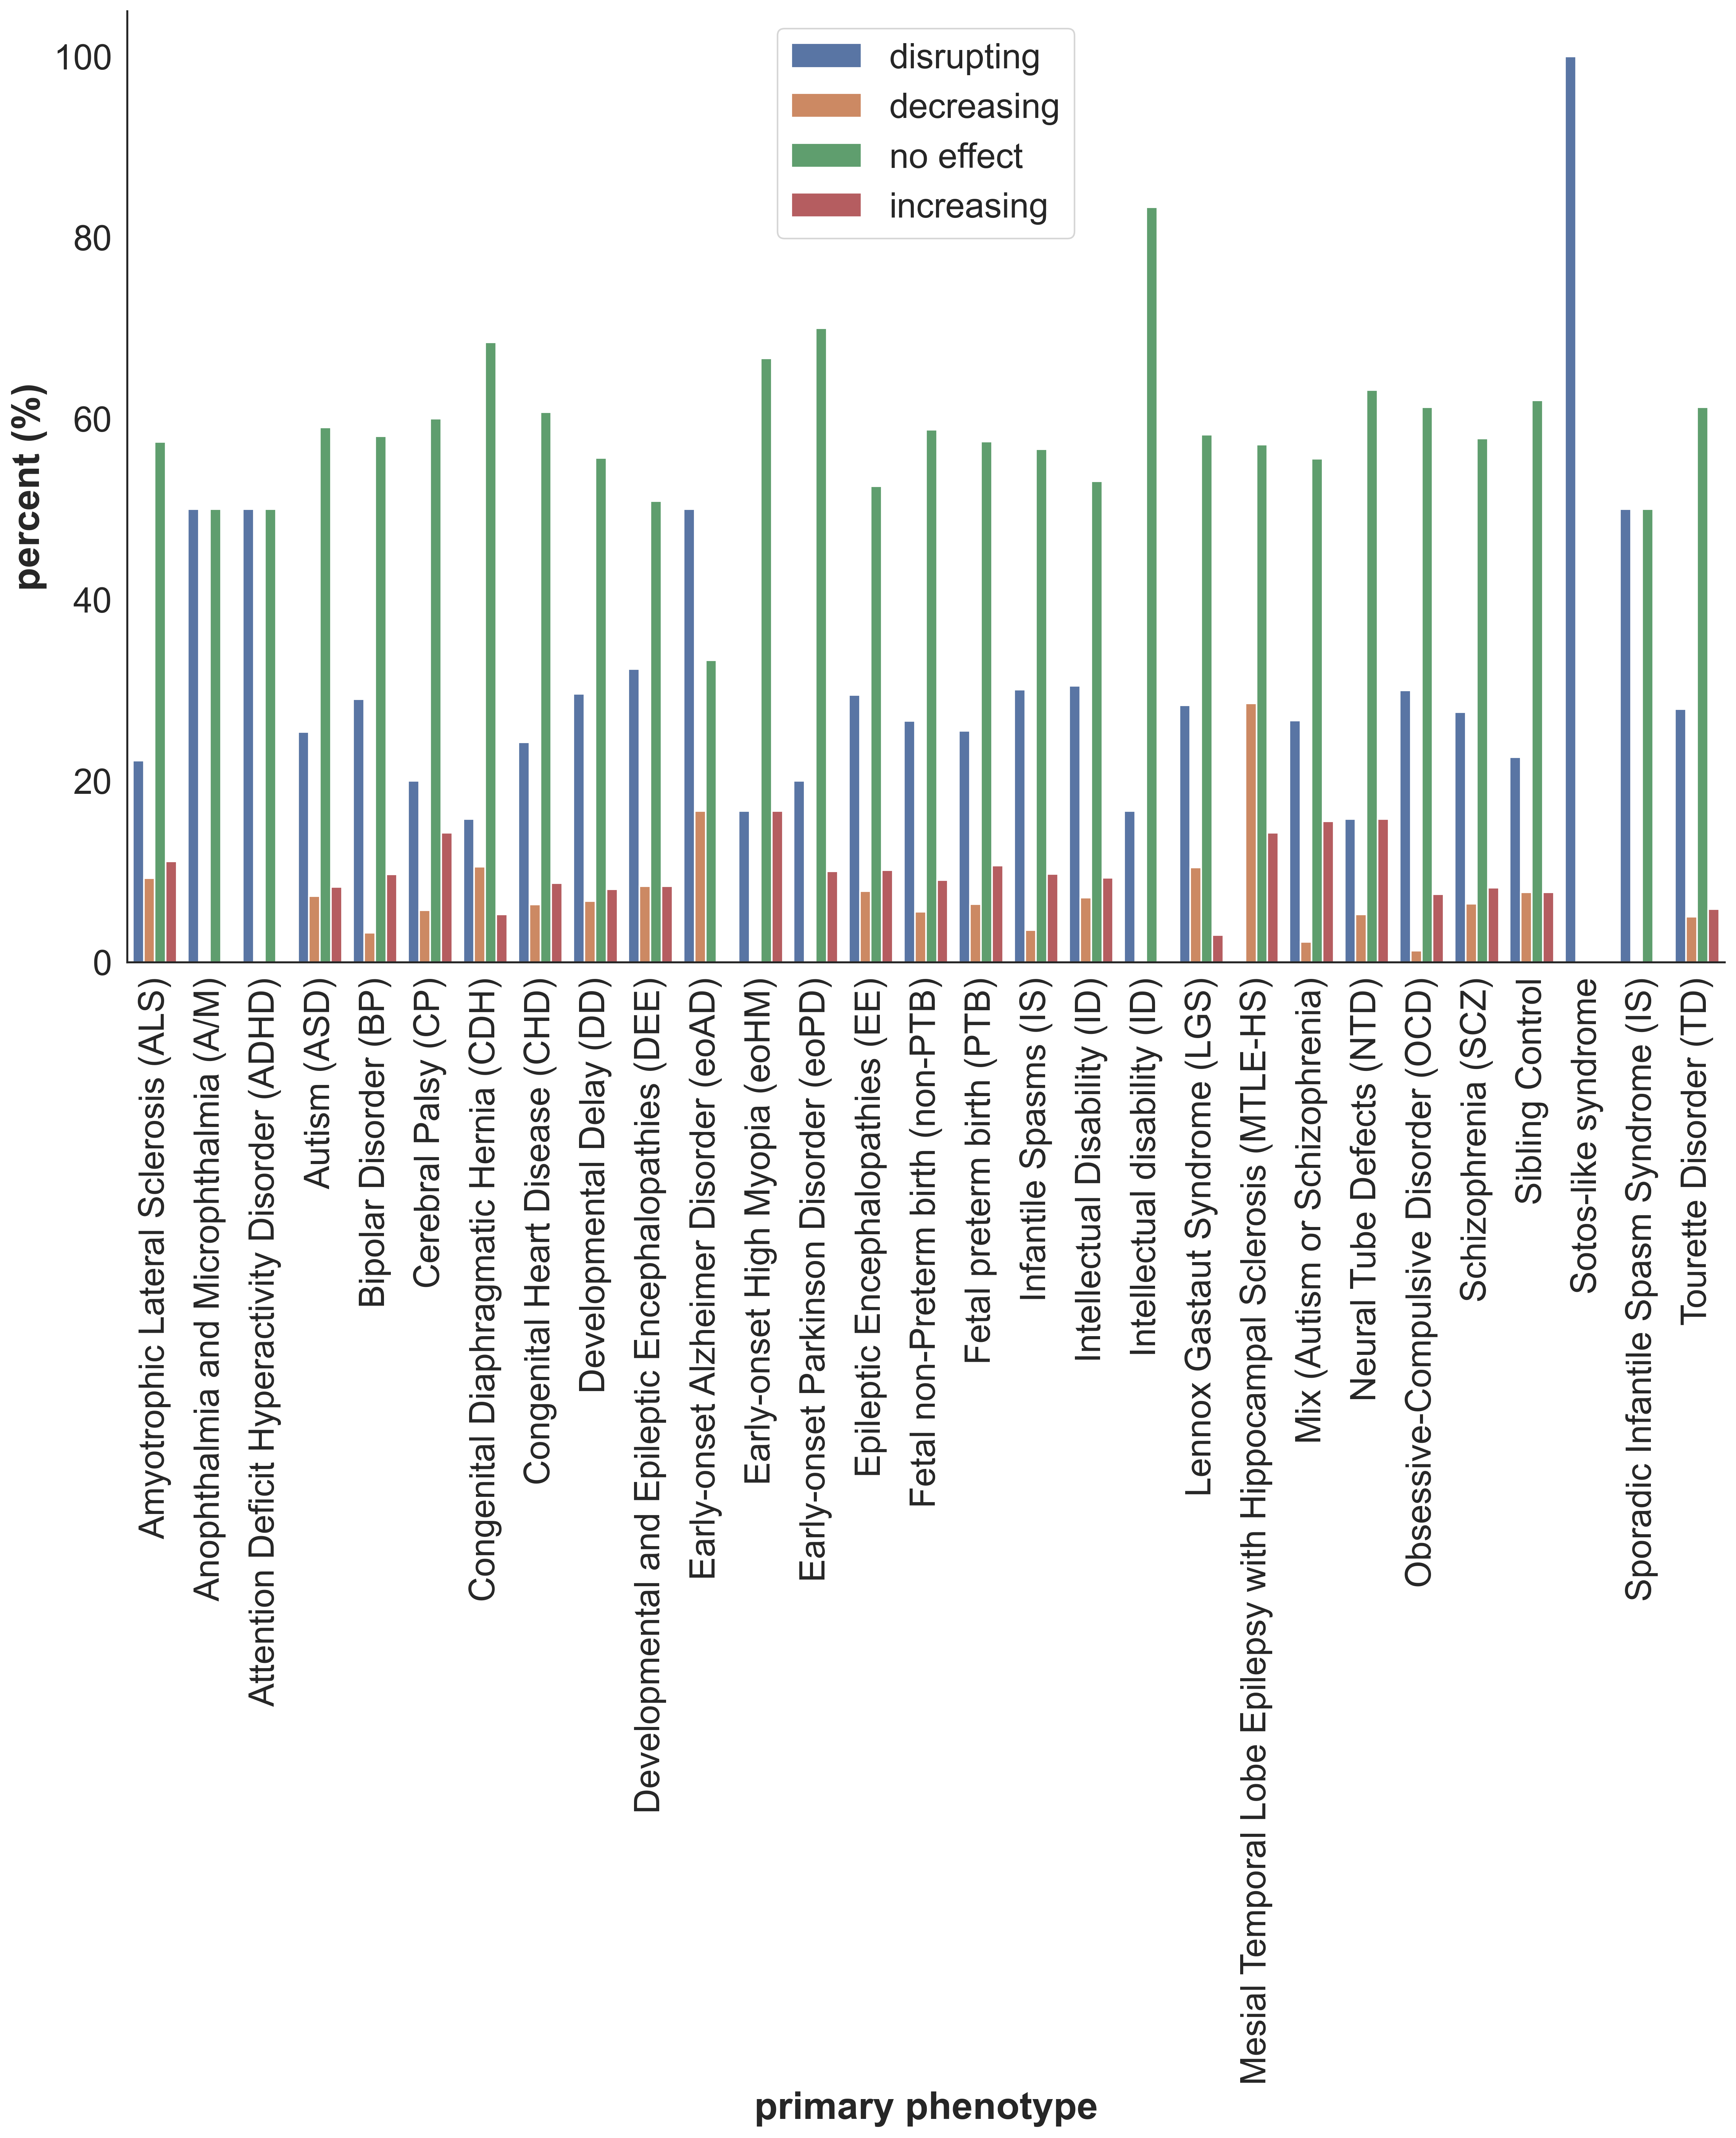

In [249]:
sns.set(font_scale=2, style='white')
fig, ax = plt.subplots(figsize=(18, 11), dpi=300)
hue_order = ['disrupting', 'decreasing', 'no effect', 'increasing']
x, y = 'PrimaryPhenotype', 'pred_most_common_type'
df_1 = master_table.groupby(x)[y].value_counts(normalize=True)
df_1 = df_1.mul(100)
df_1 = df_1.rename('percent').reset_index()

test_plot = sns.barplot(data=df_1, x=x, y='percent', hue=y, ax=ax, hue_order=hue_order)
for item in test_plot.get_xticklabels():
    item.set_rotation(90)

ax.set_xlabel('primary phenotype', fontsize=24, fontweight='bold')
ax.set_ylabel('percent (%)', fontsize=24, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend().set_title('')
# plt.tight_layout()

test_plot.figure.savefig("../data/psymukb/after_predict/pred_type_disease_percent_nomixhealthy.tiff", dpi=300, bbox_inches='tight')

# png1 = io.BytesIO()
# plt.savefig(png1, format="png")
# # Load this image into PIL
# png2 = Image.open(png1)
# # Save as TIFF
# png2.save("../data/psymukb/after_predict/pred_type_disease_count.tiff", dpi=png2.info['dpi'])
# png1.close()


In [36]:
group1 = [2388, 512, 3764, 513]
group2 = [784, 275, 2976, 462]
group_name = ['disrupting', 'decreasing', 'no effect', 'increasing']
adjust_cof = len(group1) * (len(group1) - 1) / 2
for i in range(len(group1) - 1):
    for j in range(i + 1, len(group1)):
        odds, p = stats.fisher_exact([[group1[i], group1[j]], [group2[i], group2[j]]])
#         print([[group1[i], group2[i]], [group1[j], group2[j]]])
        print('{} and {}, OR: {:.3f}, p-value: {:.5f}'.format(group_name[i], group_name[j], odds, p * adjust_cof))

disrupting and decreasing, OR: 1.636, p-value: 0.00000
disrupting and no effect, OR: 2.408, p-value: 0.00000
disrupting and increasing, OR: 2.743, p-value: 0.00000
decreasing and no effect, OR: 1.472, p-value: 0.00000
decreasing and increasing, OR: 1.677, p-value: 0.00000
no effect and increasing, OR: 1.139, p-value: 0.34856


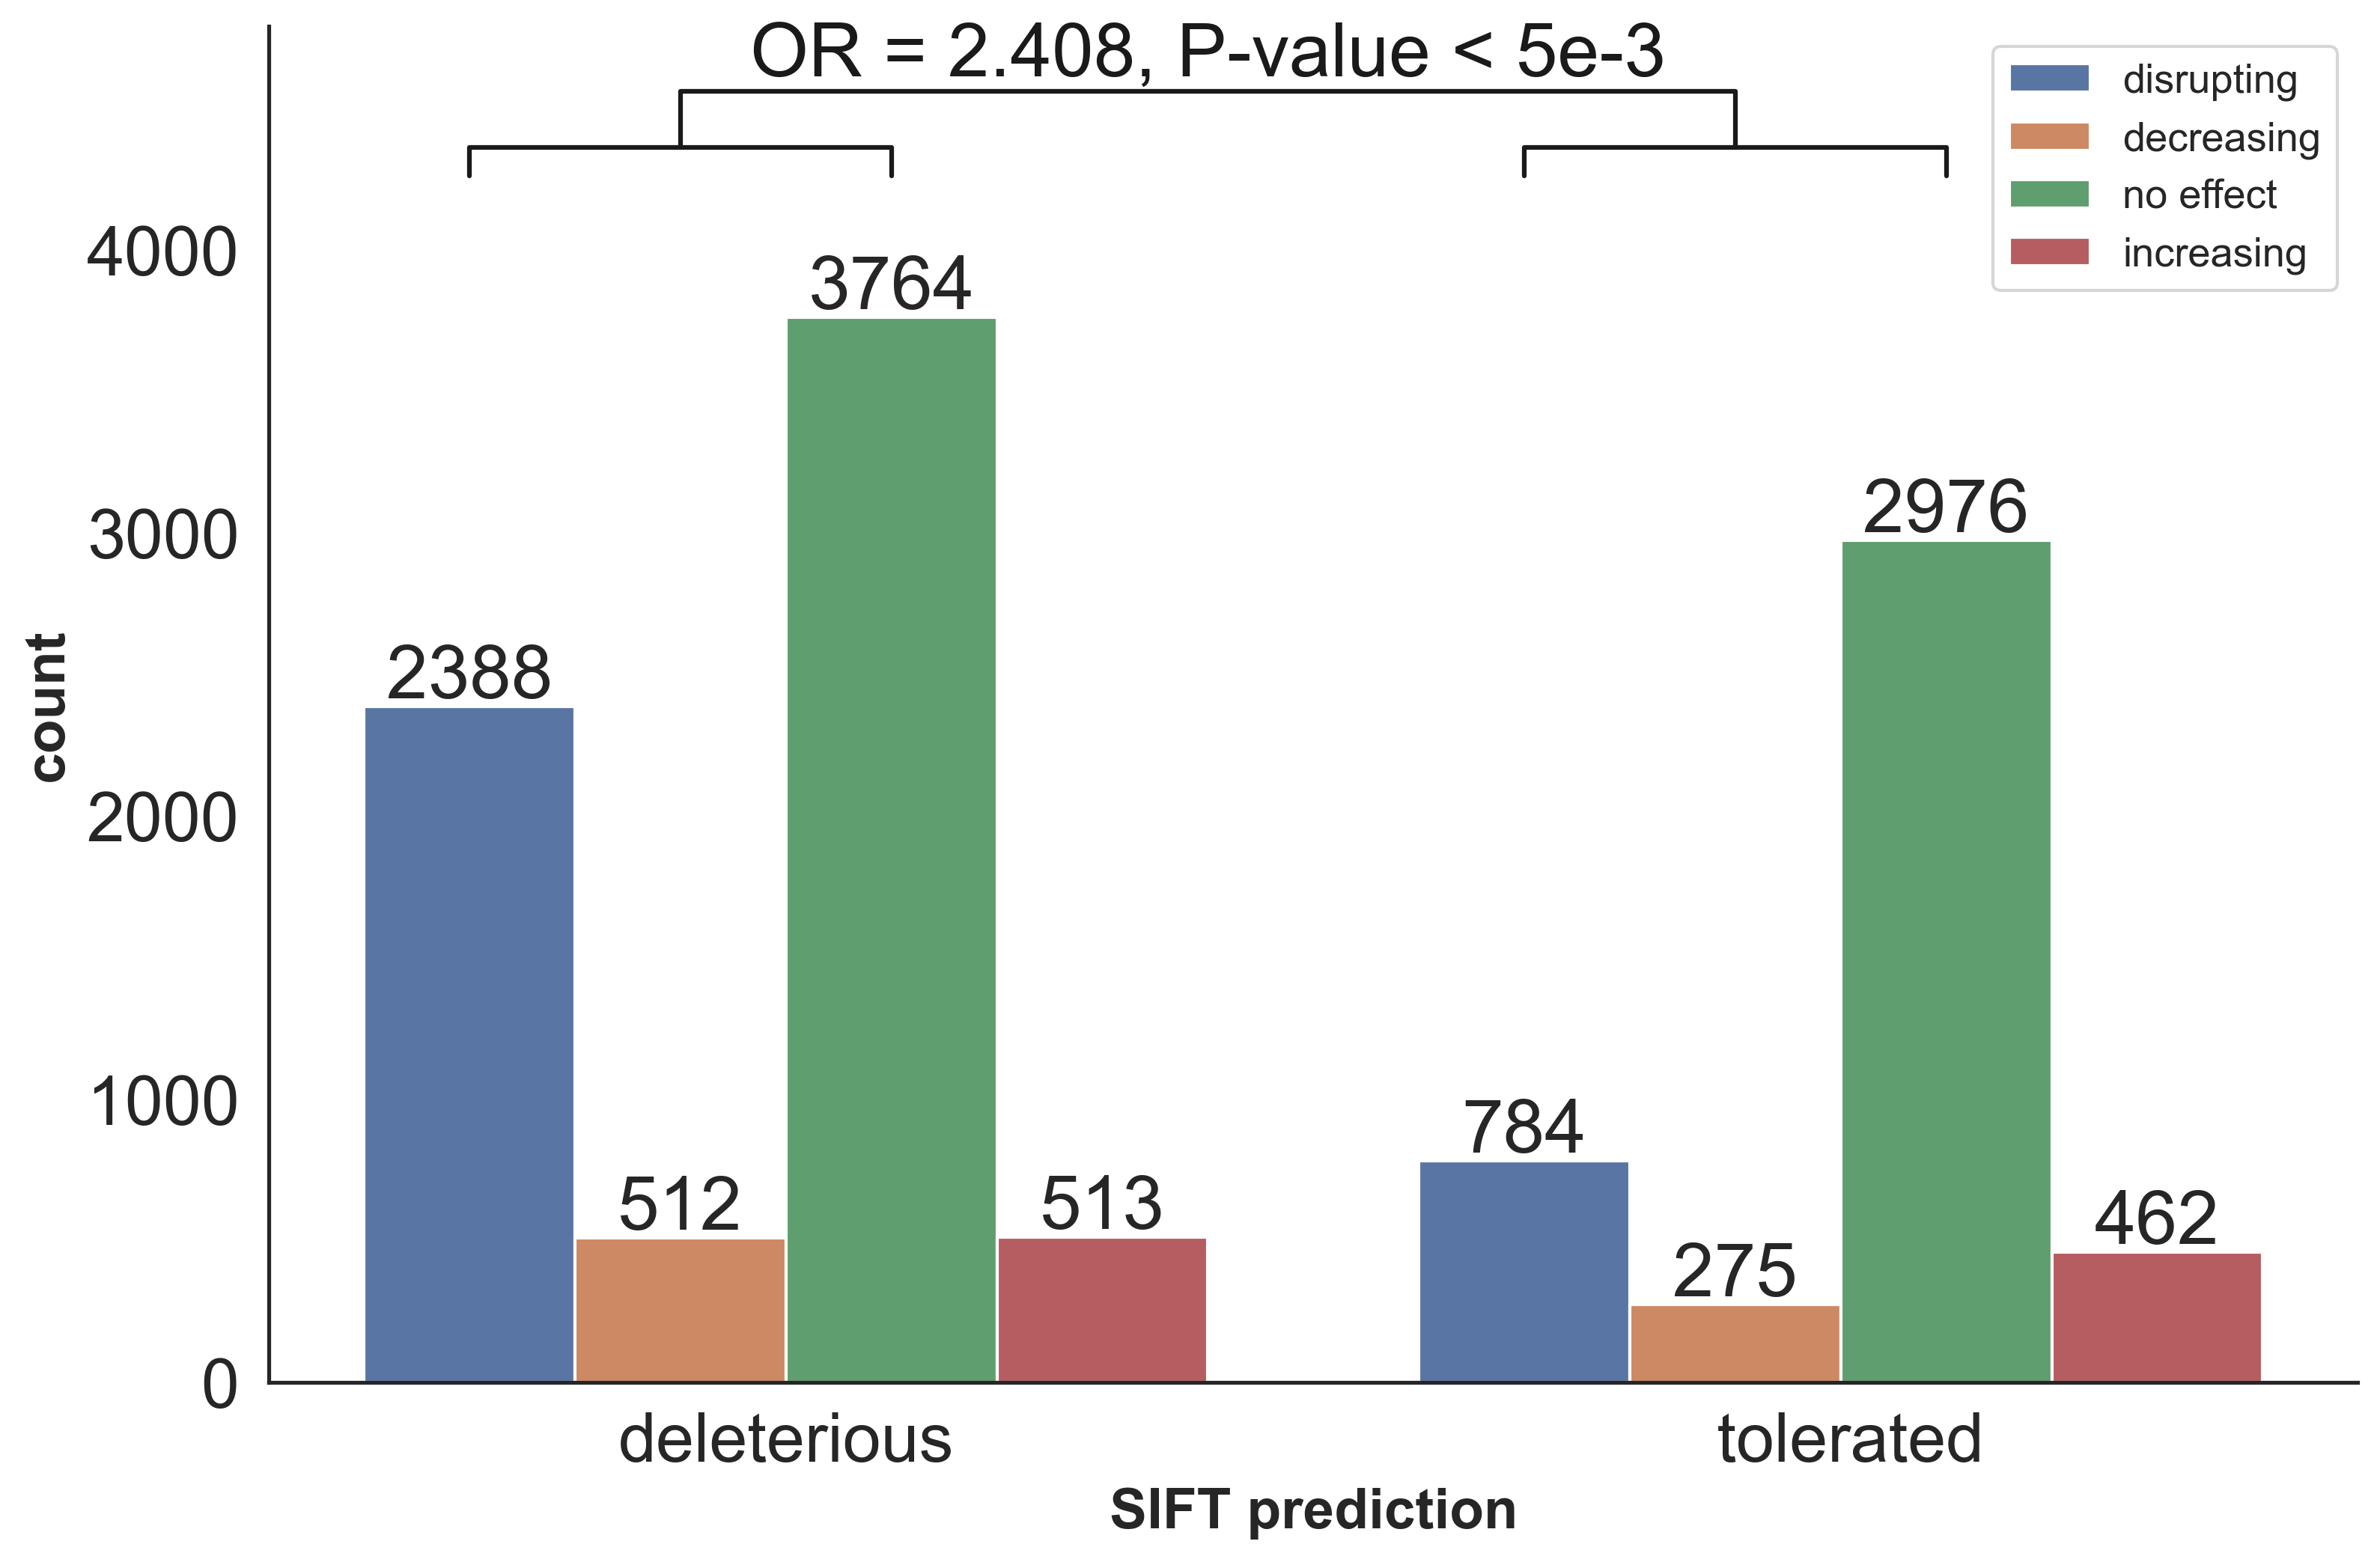

In [122]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
sns.set(font_scale=2, style='white')
hue_order = ['disrupting', 'decreasing', 'no effect', 'increasing']
test_plot = sns.countplot(data=master_table[~(master_table['SIFT_pred'] == '.')], x='SIFT_pred', hue='pred_most_common_type', ax=ax, hue_order=hue_order)

for p in test_plot.patches:
    test_plot.annotate(p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.legend().set_title('')
ax.legend(fontsize='13')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_xlabel('SIFT prediction', fontsize=18, fontweight='bold')
ax.set_ylabel('count', fontsize=18, fontweight='bold')
test_plot.set(xticklabels=['deleterious', ' tolerated'])


x1, x2 = -0.1, 0.9   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 3764 + 600, 200, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.plot([x1 - 0.2, x1 - 0.2, x1 + 0.2, x1 + 0.2], [y - h * 0.5, y, y, y - h * 0.5], lw=1.5, c=col)
plt.plot([x2 - 0.2, x2 - 0.2, x2 + 0.2, x2 + 0.2], [y - h * 0.5, y, y, y - h * 0.5], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "OR = 2.408, P-value < 5e-3", ha='center', va='bottom', color=col)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)





# plt.legend(loc='upper right')

png1 = io.BytesIO()
plt.savefig(png1, format="png")
# Load this image into PIL
png2 = Image.open(png1)
# Save as TIFF
png2.save("../data/psymukb/after_predict/pred_type_SIFT_count_nomixhealthy.tiff", dpi=png2.info['dpi'])
png1.close()

### tested in R language, based on more than 1e+07 replicates used in the Monte Carlo test, the two distribution above is different with p-value < 1e-07, chi-square test with p-value < 2.2e-16. Variants predicted DISRUPTING in MIPPI tend to DELETERIOUS in SIFT prediction more.

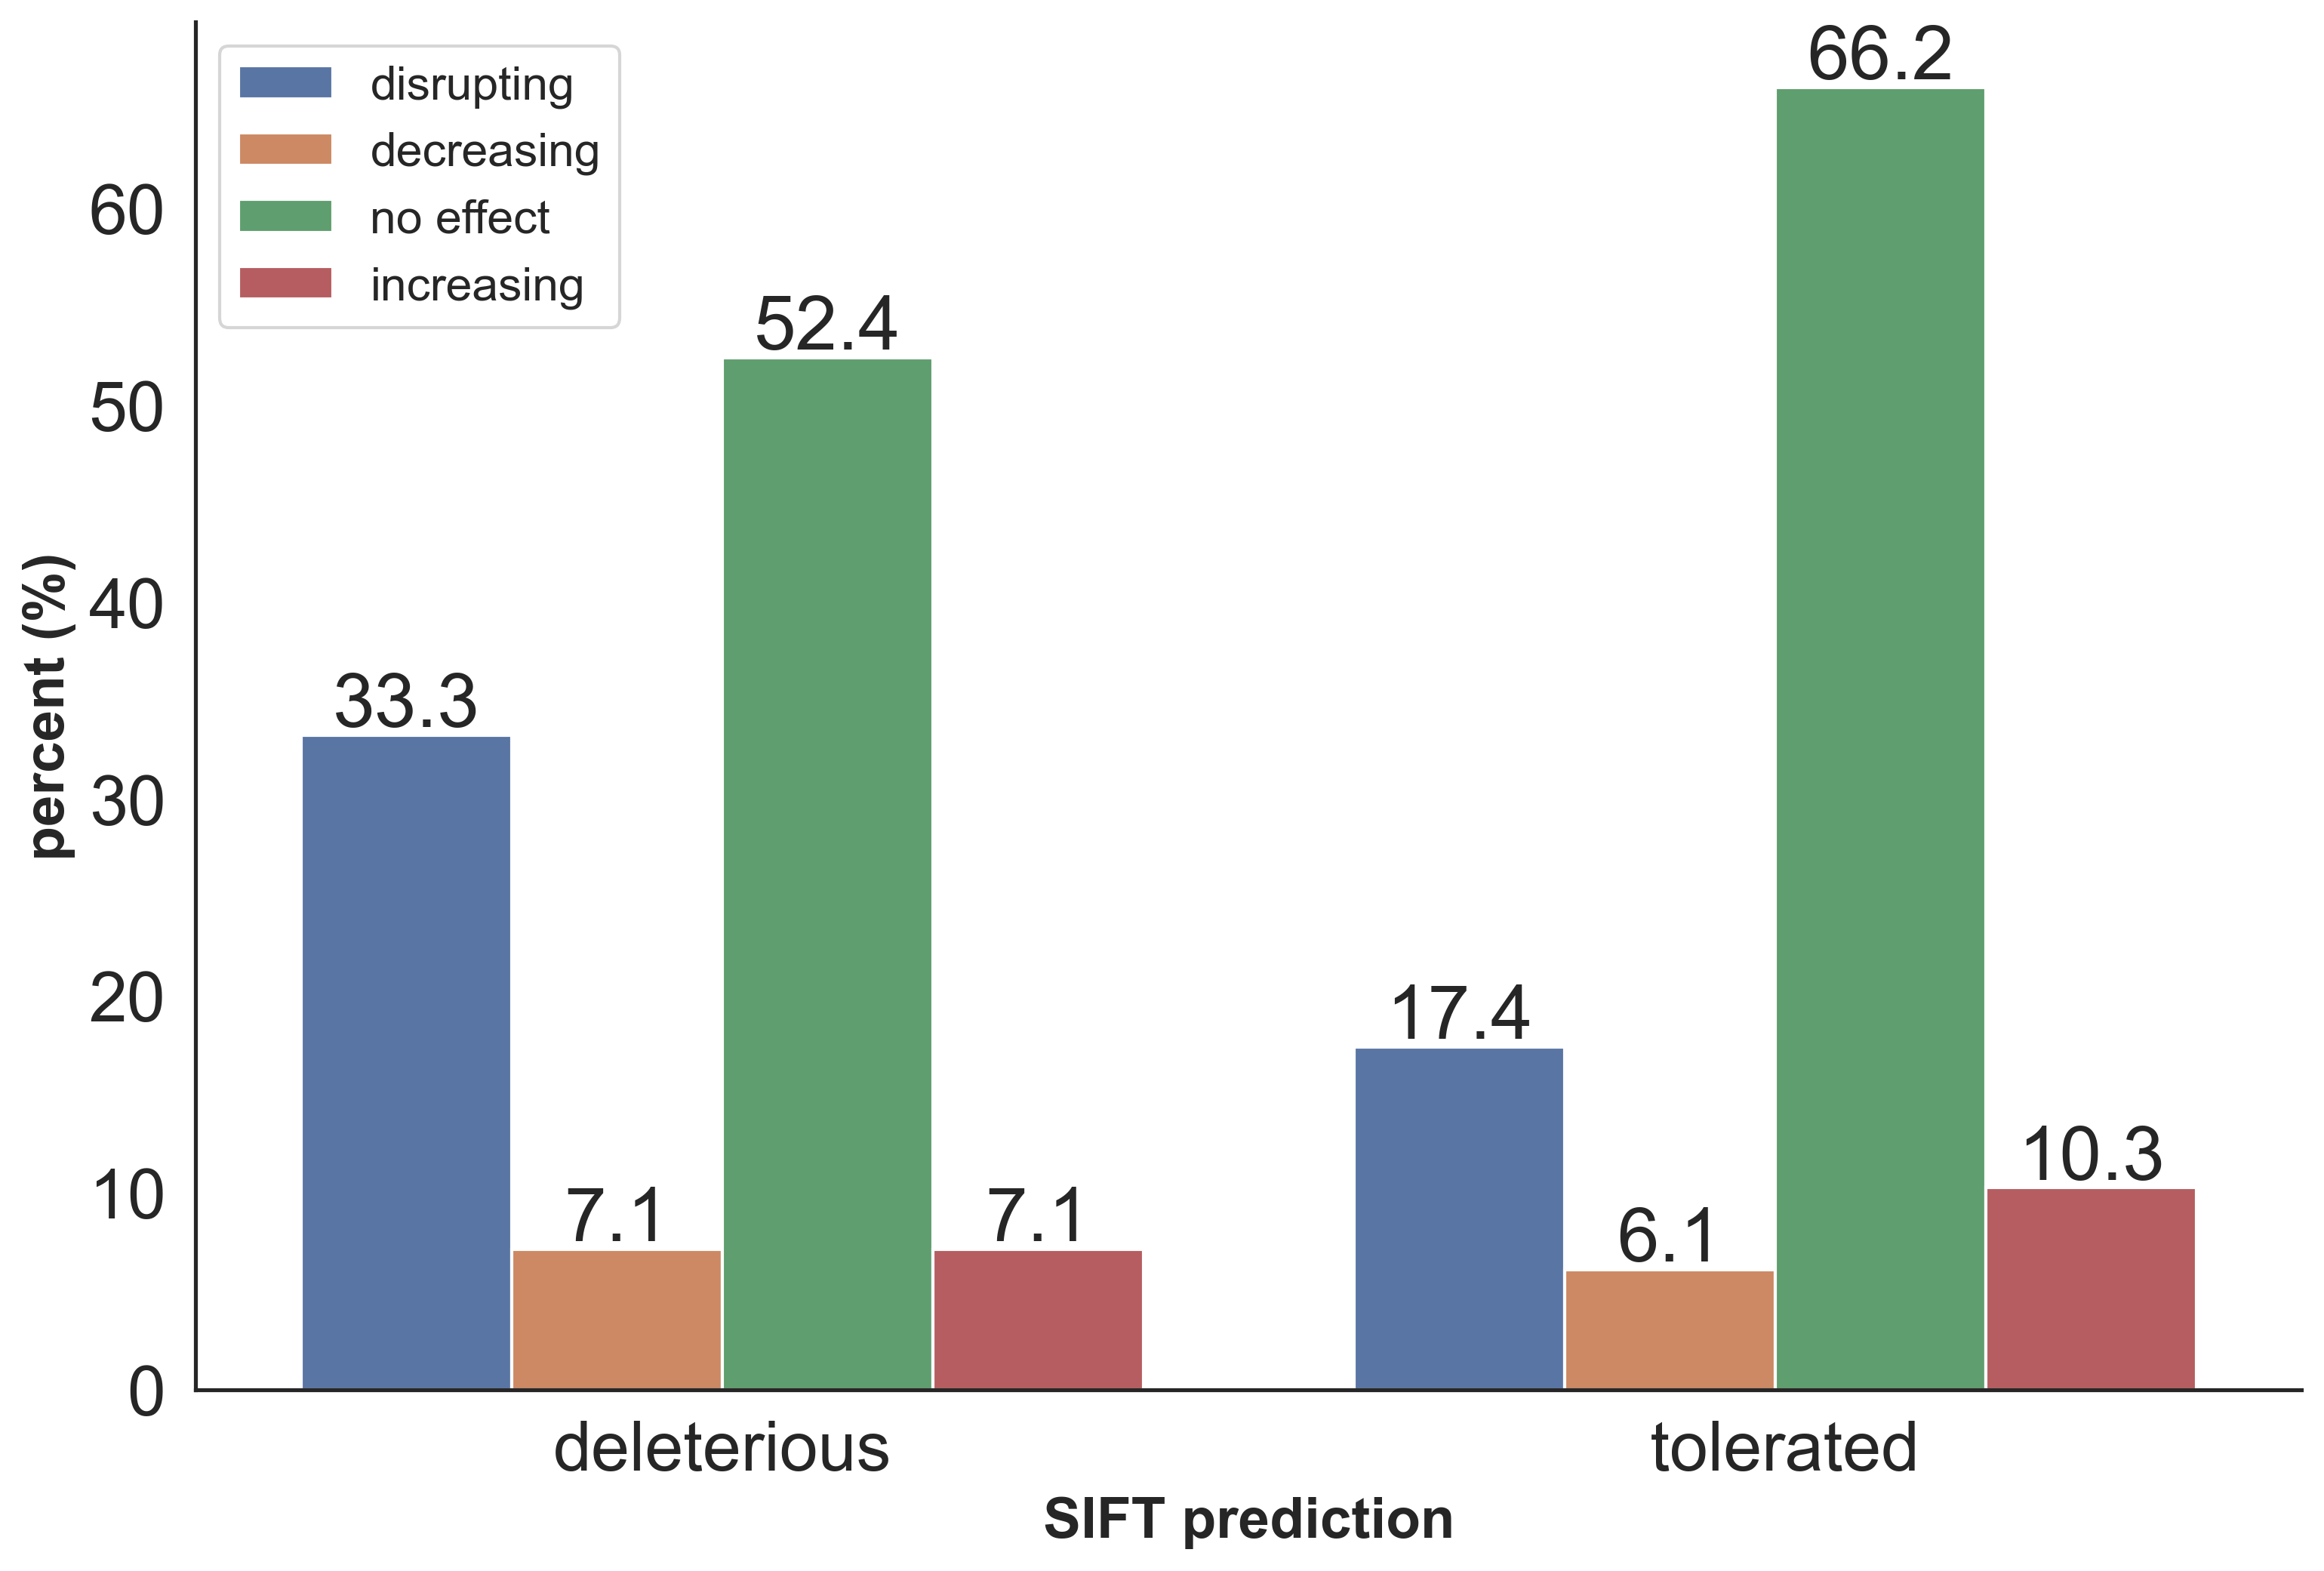

In [251]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
sns.set(font_scale=2, style='white')
hue_order = ['disrupting', 'decreasing', 'no effect', 'increasing']

x, y = 'SIFT_pred', 'pred_most_common_type'
df_1 = master_table[~(master_table['SIFT_pred'] == '.')]
df_1 = df_1.groupby(x)[y].value_counts(normalize=True)
df_1 = df_1.mul(100)
df_1 = df_1.rename('percent').reset_index()
test_plot = sns.barplot(data=df_1, x=x, y='percent', hue=y, ax=ax, hue_order=hue_order)

for p in test_plot.patches:
    test_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.legend().set_title('')
ax.legend(fontsize='15')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_xlabel('SIFT prediction', fontsize=18, fontweight='bold')
ax.set_ylabel('percent (%)', fontsize=18, fontweight='bold')
test_plot.set(xticklabels=['deleterious', ' tolerated'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



# # plt.legend(loc='upper right')

png1 = io.BytesIO()
plt.savefig(png1, format="png")
# Load this image into PIL
png2 = Image.open(png1)
# Save as TIFF
png2.save("../data/psymukb/after_predict/pred_type_SIFT_percent_nomixhealthy.tiff", dpi=png2.info['dpi'])
png1.close()

In [37]:
group1 = [849, 185, 1324, 215]
group2 = [2232, 579, 5143, 722]
group_name = ['disrupting', 'decreasing', 'no effect', 'increasing']
adjust_cof = len(group1) * (len(group1) - 1) / 2
for i in range(len(group1) - 1):
    for j in range(i + 1, len(group1)):
        odds, p = stats.fisher_exact([[group1[i], group1[j]], [group2[i], group2[j]]])
#         print([[group1[i], group2[i]], [group1[j], group2[j]]])
        print('{} and {}, OR: {:.3f}, p-value: {:.5f}'.format(group_name[i], group_name[j], odds, p * adjust_cof))

disrupting and decreasing, OR: 1.190, p-value: 0.40931
disrupting and no effect, OR: 1.478, p-value: 0.00000
disrupting and increasing, OR: 1.277, p-value: 0.03147
decreasing and no effect, OR: 1.241, p-value: 0.11106
decreasing and increasing, OR: 1.073, p-value: 3.39344
no effect and increasing, OR: 0.865, p-value: 0.50928


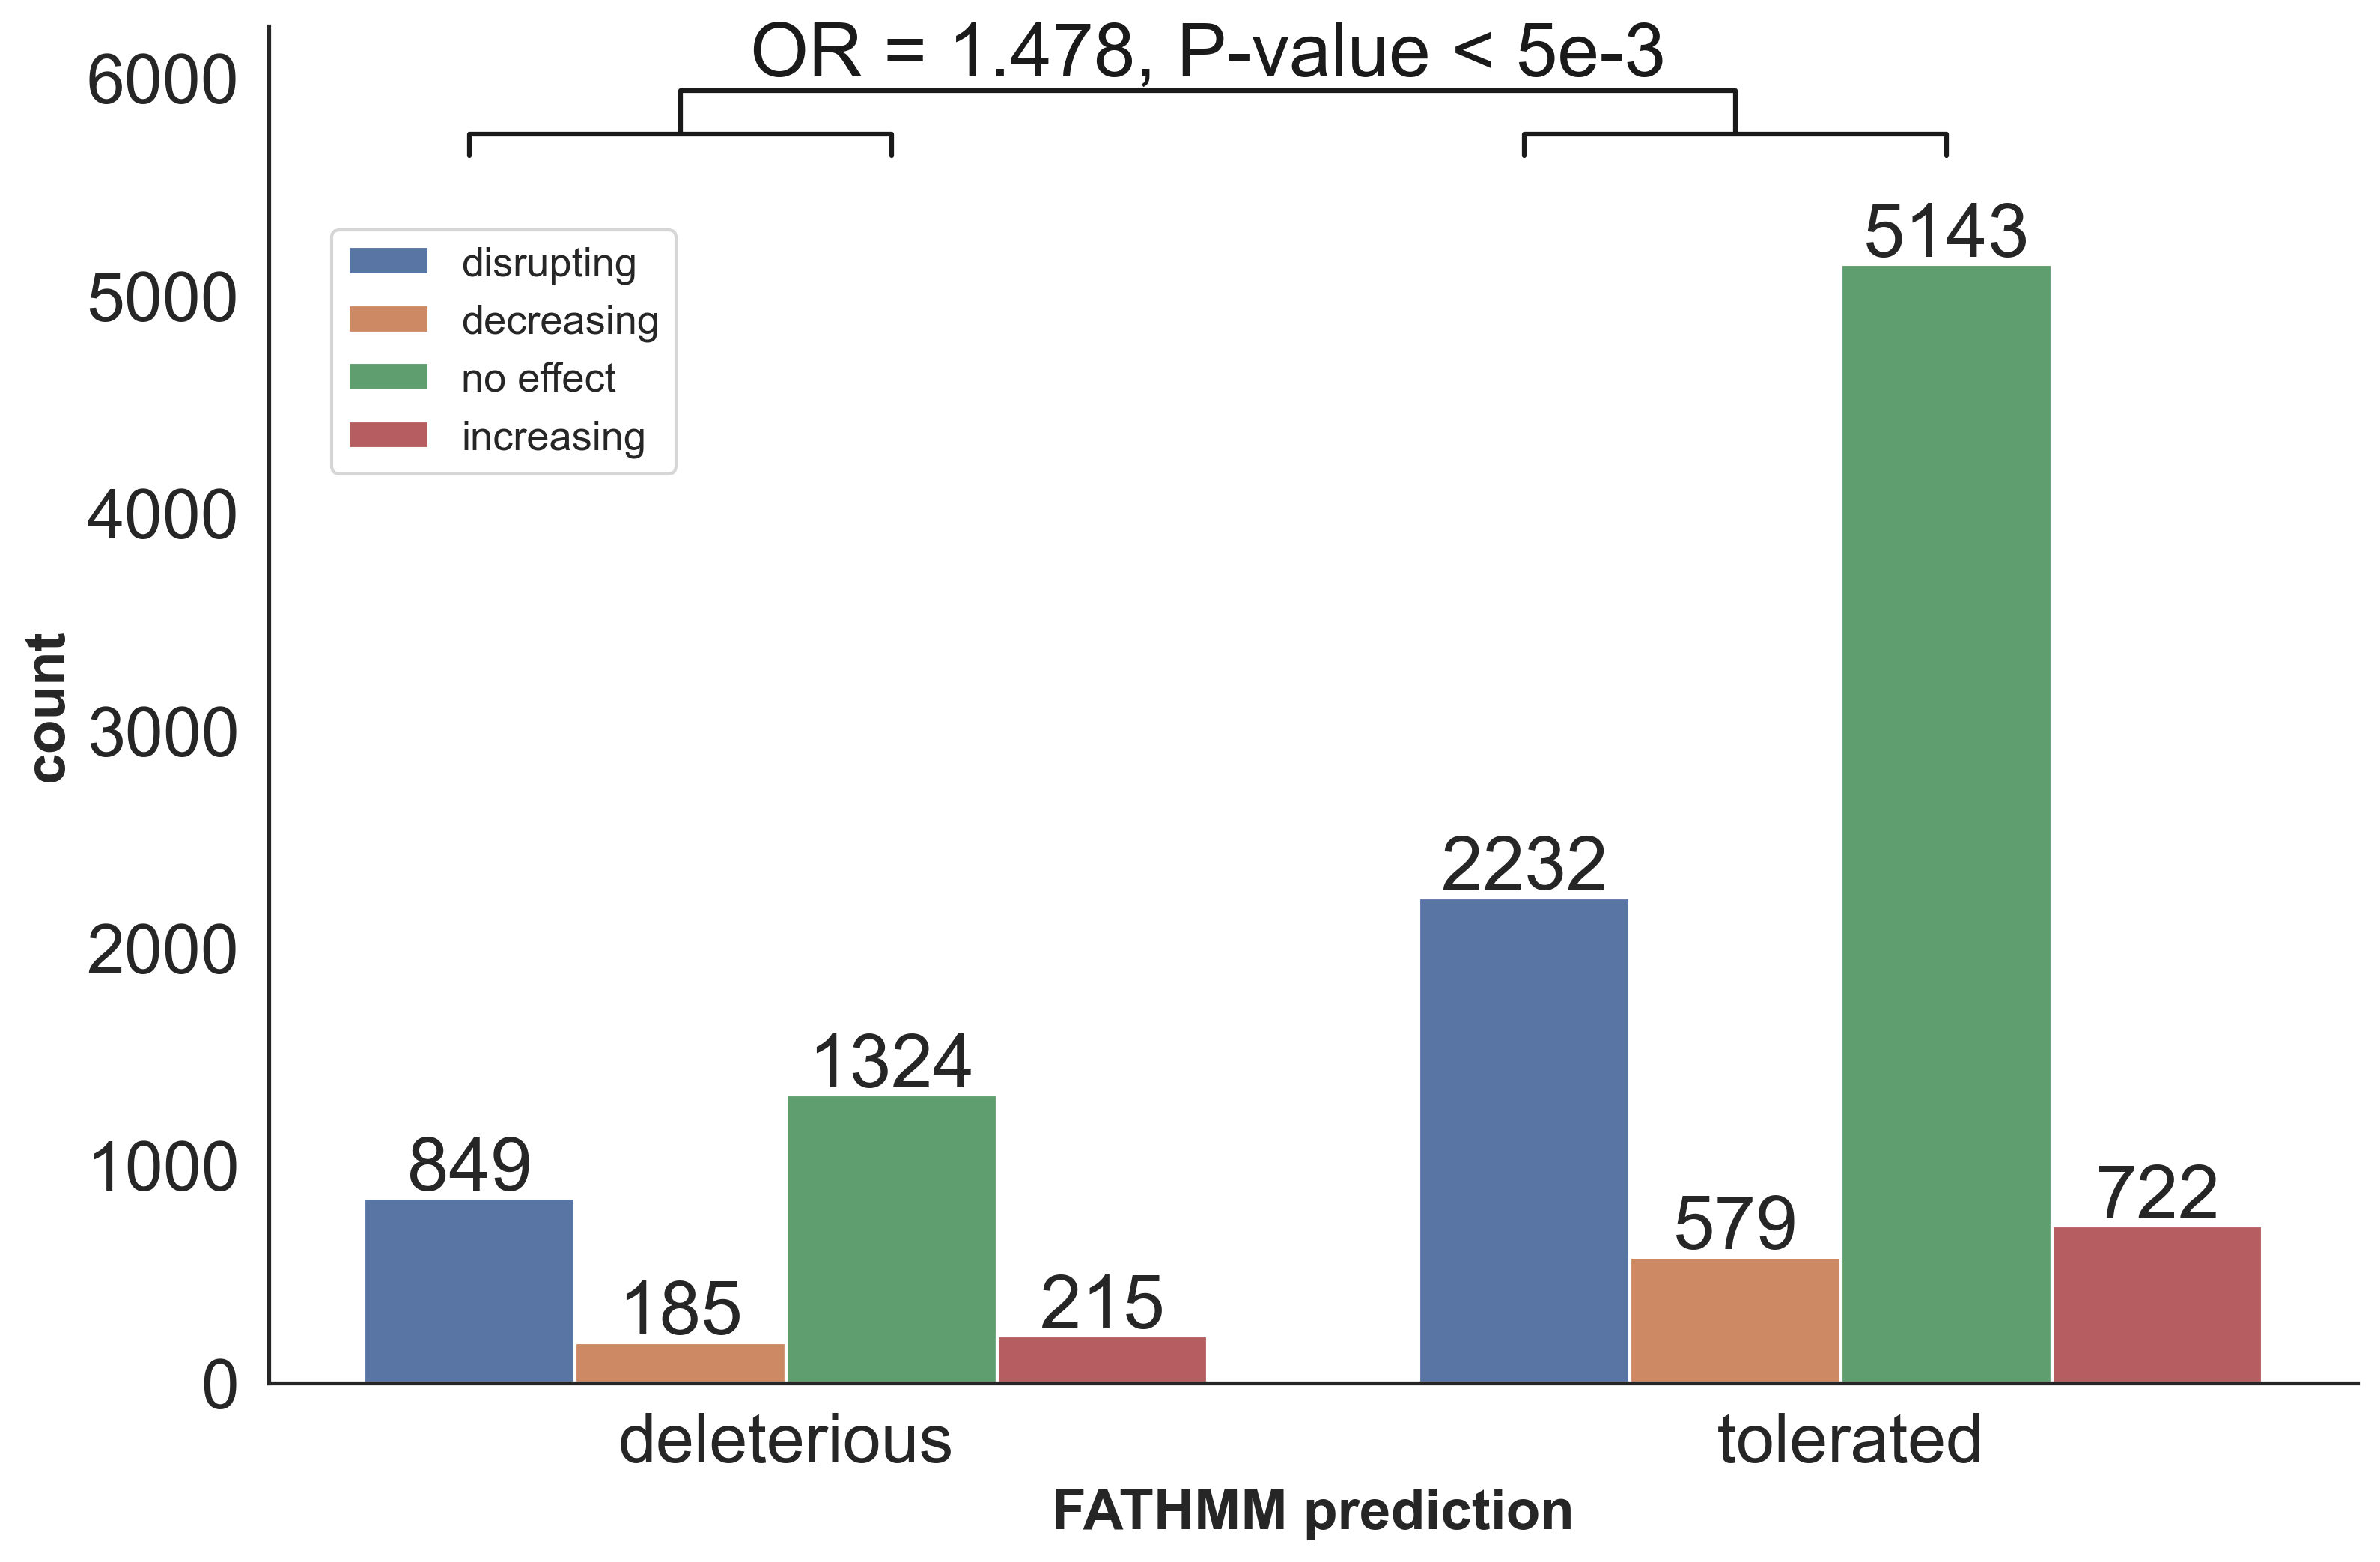

In [121]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
sns.set(font_scale=2, style='white')
hue_order = ['disrupting', 'decreasing', 'no effect', 'increasing']
test_plot = sns.countplot(data=master_table[~(master_table['FATHMM_pred'] == '.')], x='FATHMM_pred', hue='pred_most_common_type', ax=ax, hue_order=hue_order, order=['D', 'T'])

for p in test_plot.patches:
    test_plot.annotate(p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.legend().set_title('')
ax.legend(fontsize='13', bbox_to_anchor=(.03, .85), loc=2, borderaxespad=0.)


ax.set_xlabel('FATHMM prediction', fontsize=18, fontweight='bold')
ax.set_ylabel('count', fontsize=18, fontweight='bold')
# test_plot.set(xticklabels=['deleterious', ' tolerated'])
test_plot.set(xticklabels=['deleterious', ' tolerated'])

x1, x2 = -0.1, 0.9   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 5143 + 600, 200, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.plot([x1 - 0.2, x1 - 0.2, x1 + 0.2, x1 + 0.2], [y - h * 0.5, y, y, y - h * 0.5], lw=1.5, c=col)
plt.plot([x2 - 0.2, x2 - 0.2, x2 + 0.2, x2 + 0.2], [y - h * 0.5, y, y, y - h * 0.5], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "OR = 1.478, P-value < 5e-3", ha='center', va='bottom', color=col)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)





# plt.legend(loc='upper right')

png1 = io.BytesIO()
plt.savefig(png1, format="png")
# Load this image into PIL
png2 = Image.open(png1)
# Save as TIFF
png2.save("../data/psymukb/after_predict/pred_type_FATHMM_count_nomixhealthy.tiff", dpi=png2.info['dpi'])
png1.close()

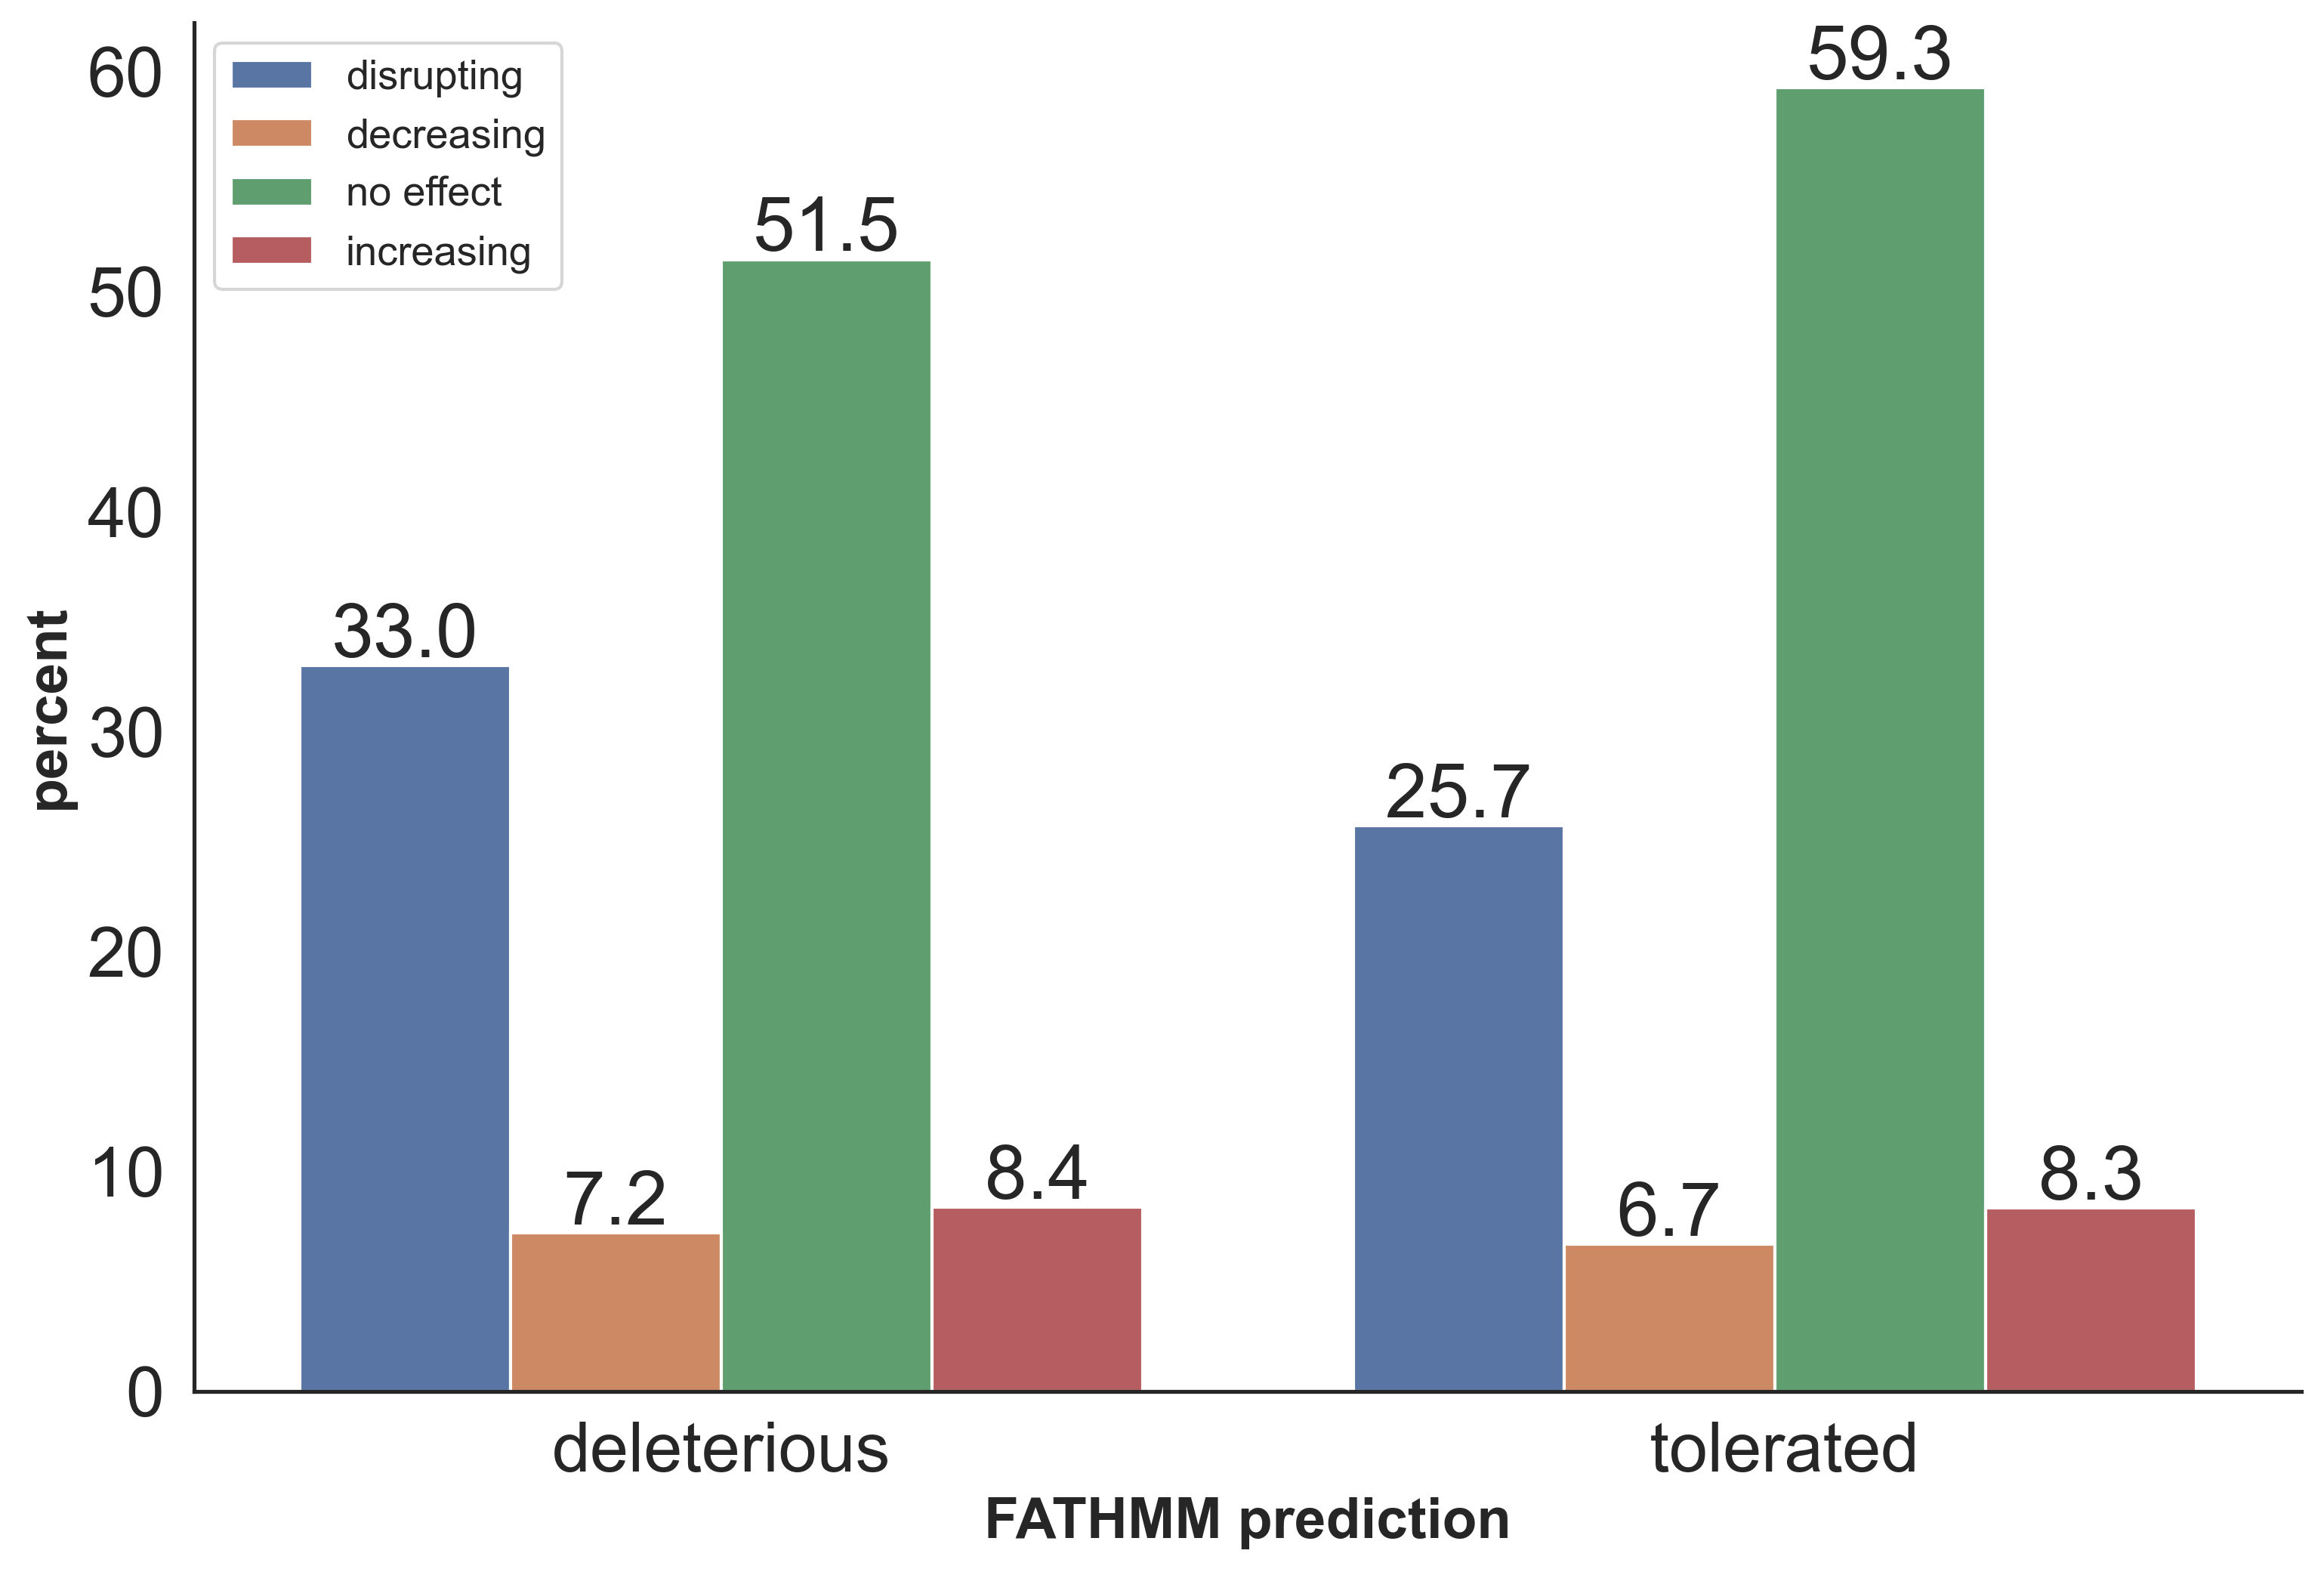

In [253]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
sns.set(font_scale=2, style='white')
hue_order = ['disrupting', 'decreasing', 'no effect', 'increasing']


x, y = 'FATHMM_pred', 'pred_most_common_type'
df_1 = master_table[~(master_table['FATHMM_pred'] == '.')]
df_1 = df_1.groupby(x)[y].value_counts(normalize=True)
df_1 = df_1.mul(100)
df_1 = df_1.rename('percent').reset_index()
test_plot = sns.barplot(data=df_1, x=x, y='percent', hue=y, ax=ax, hue_order=hue_order, order=['D', 'T'])


# test_plot = sns.countplot(data=master_table[~(master_table['FATHMM_pred'] == '.')], x='FATHMM_pred', hue='pred_most_common_type', ax=ax, hue_order=hue_order)

for p in test_plot.patches:
    test_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.legend().set_title('')
ax.legend(fontsize='13')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_xlabel('FATHMM prediction', fontsize=18, fontweight='bold')
ax.set_ylabel('percent', fontsize=18, fontweight='bold')
test_plot.set(xticklabels=['deleterious', ' tolerated'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)





# plt.legend(loc='upper right')

png1 = io.BytesIO()
plt.savefig(png1, format="png")
# Load this image into PIL
png2 = Image.open(png1)
# Save as TIFF
png2.save("../data/psymukb/after_predict/pred_type_FATHMM_percent_nomixhealthy.tiff", dpi=png2.info['dpi'])
png1.close()

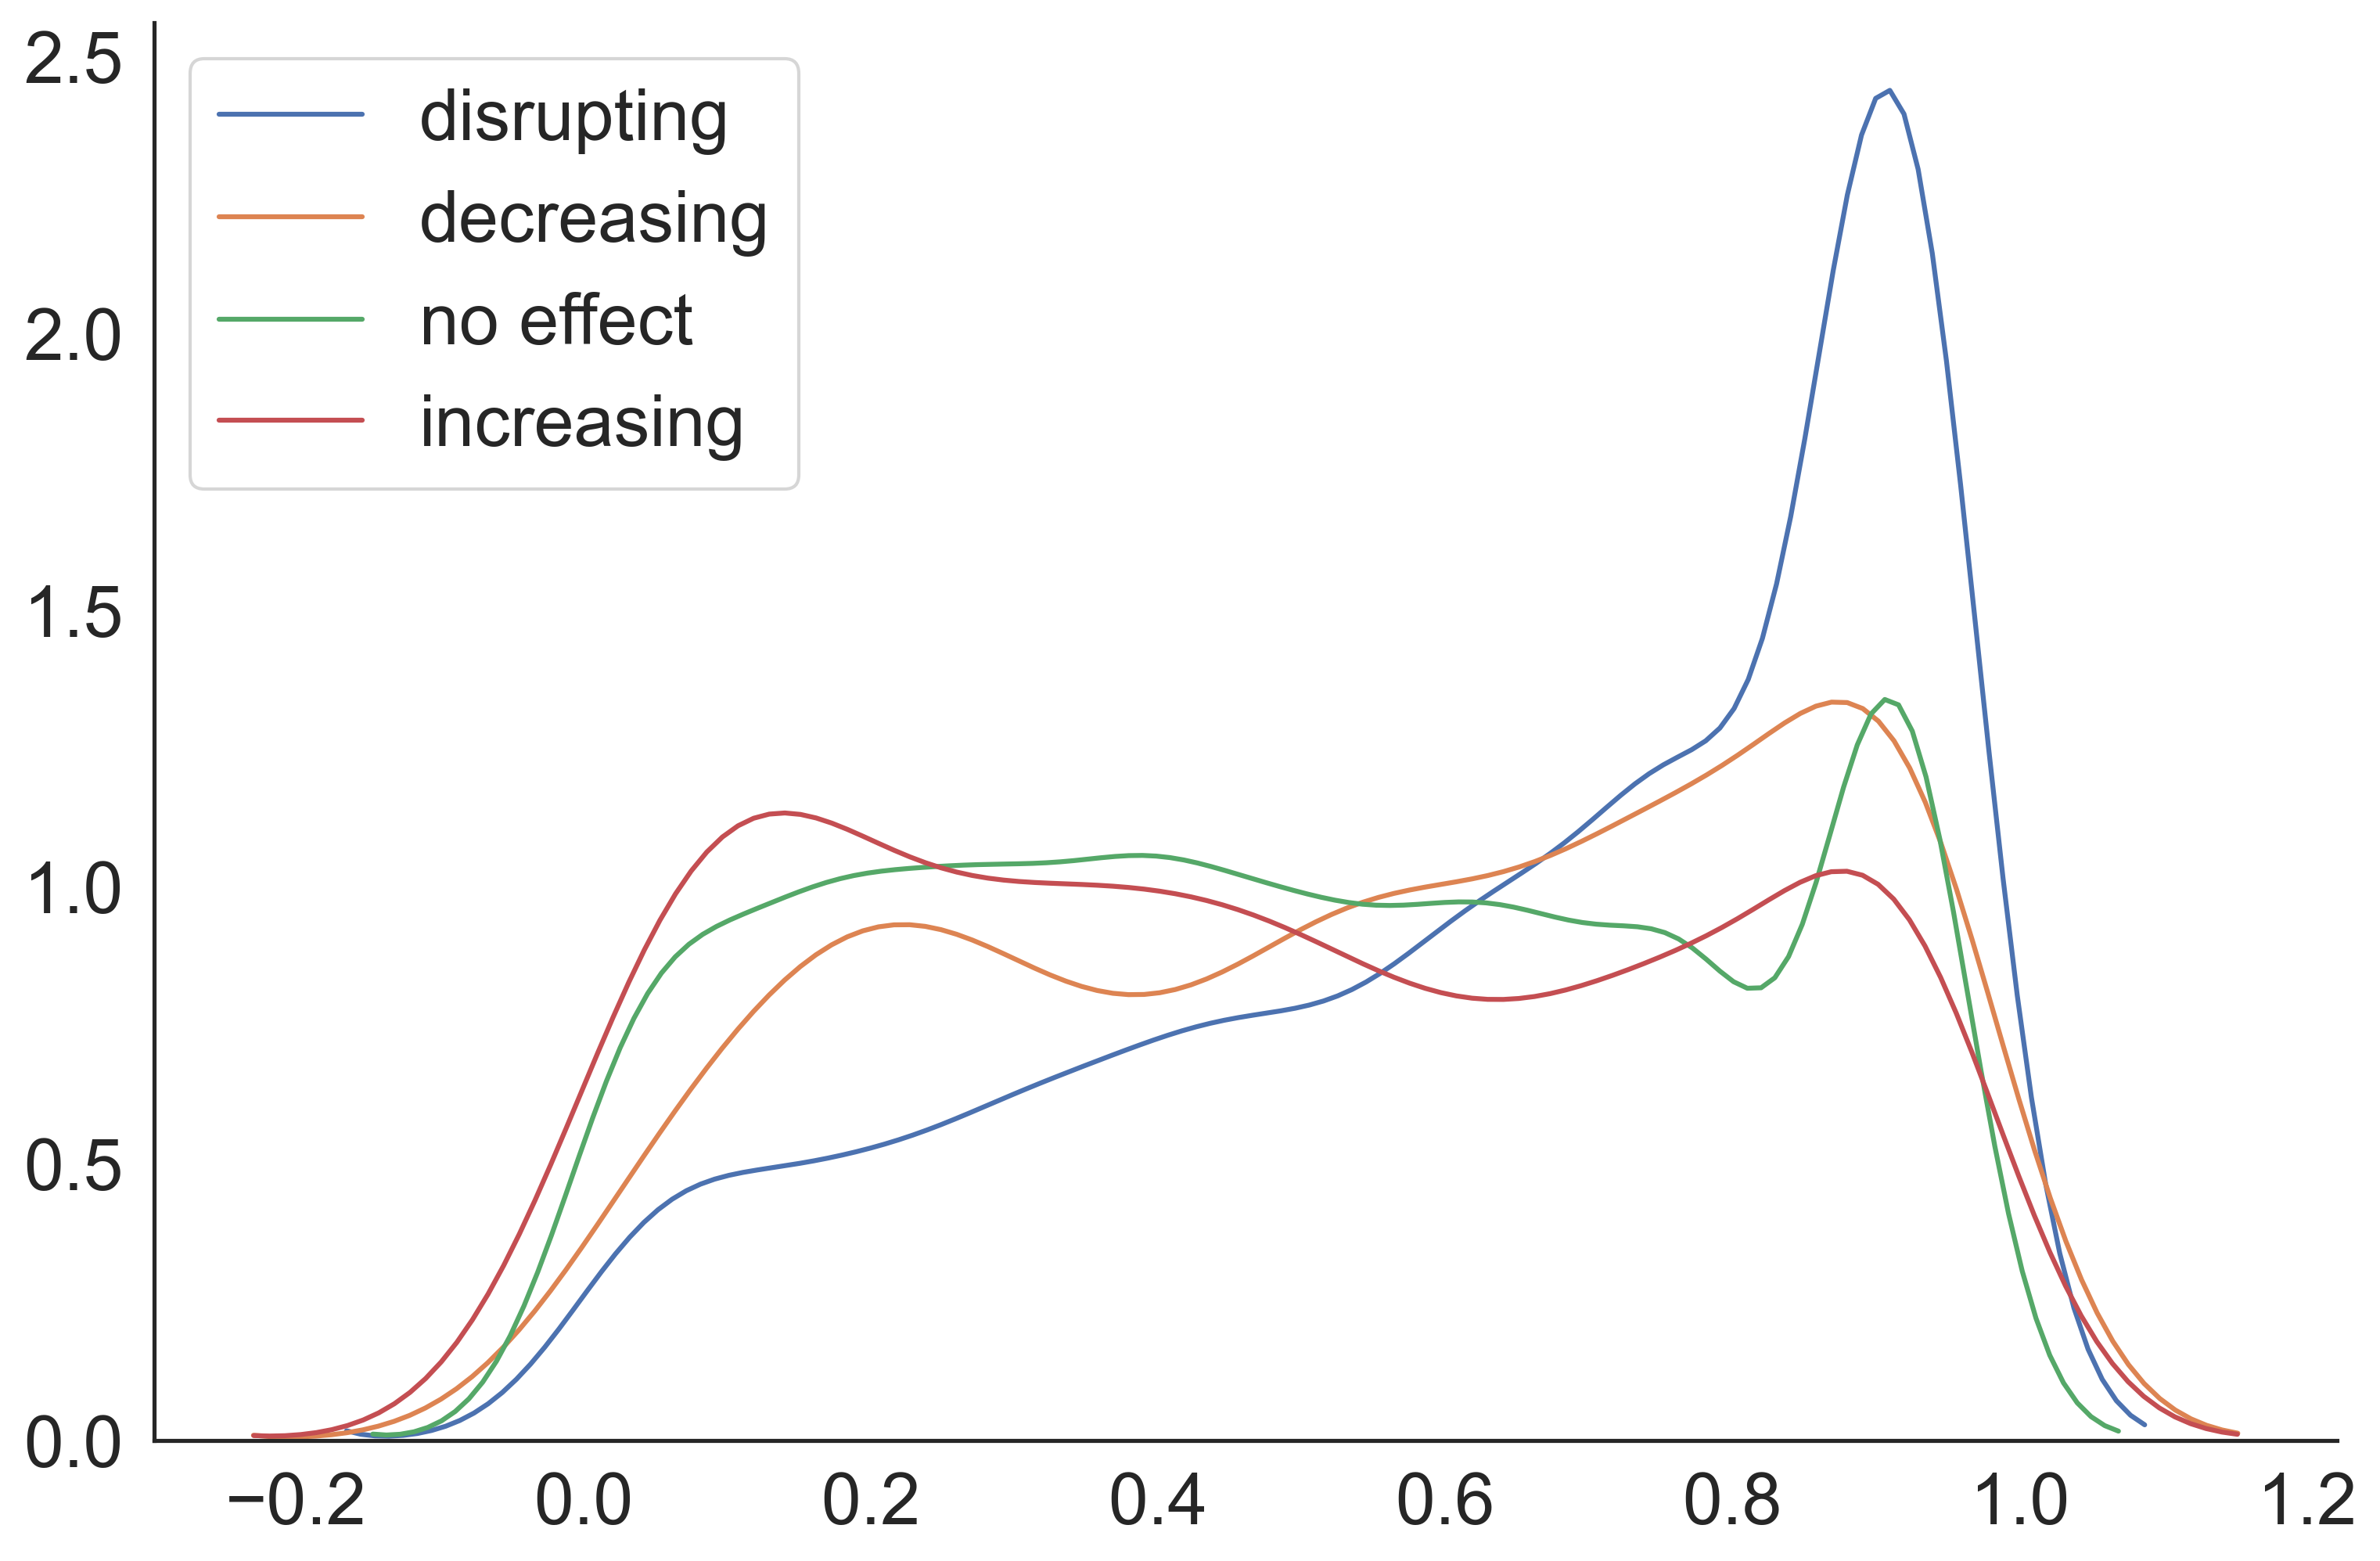

In [254]:
tmp_table = master_table[~(master_table['SIFT_score'] == '.')]

fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
sns.set(font_scale=2, style='white')
hue_order = ['disrupting', 'decreasing', 'no effect', 'increasing']
a = tmp_table[tmp_table['pred_most_common_type'] == 'disrupting']
b = tmp_table[tmp_table['pred_most_common_type'] == 'decreasing']
c = tmp_table[tmp_table['pred_most_common_type'] == 'no effect']
d = tmp_table[tmp_table['pred_most_common_type'] == 'increasing']
sns.kdeplot(a['SIFT_converted_rankscore'], label='disrupting', ax=ax)
sns.kdeplot(b['SIFT_converted_rankscore'], label='decreasing', ax=ax)
sns.kdeplot(c['SIFT_converted_rankscore'], label='no effect', ax=ax)
sns.kdeplot(d['SIFT_converted_rankscore'], label='increasing', ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

png1 = io.BytesIO()
plt.savefig(png1, format="png")
# Load this image into PIL
png2 = Image.open(png1)
# Save as TIFF
png2.save("../data/psymukb/after_predict/pred_type_distribution_kde_nomixhealthy.tiff", dpi=png2.info['dpi'])
png1.close()

In [230]:
master_table.groupby('pred_most_common')['SIFT_converted_rankscore']

In [228]:
master_table.groupby('pred_most_common')['fathmm-MKL_coding_pred'].value_counts()

pred_most_common  fathmm-MKL_coding_pred
0                 D                         3295
                  N                          420
                  .                            5
1                 D                          779
                  N                          157
                  .                            3
2                 D                         6020
                  N                         1861
                  .                           23
3                 D                          901
                  N                          245
Name: fathmm-MKL_coding_pred, dtype: int64

In [ ]:
master_table.SIFT_converted_rankscore

In [172]:
sns.__version__

'0.10.1'

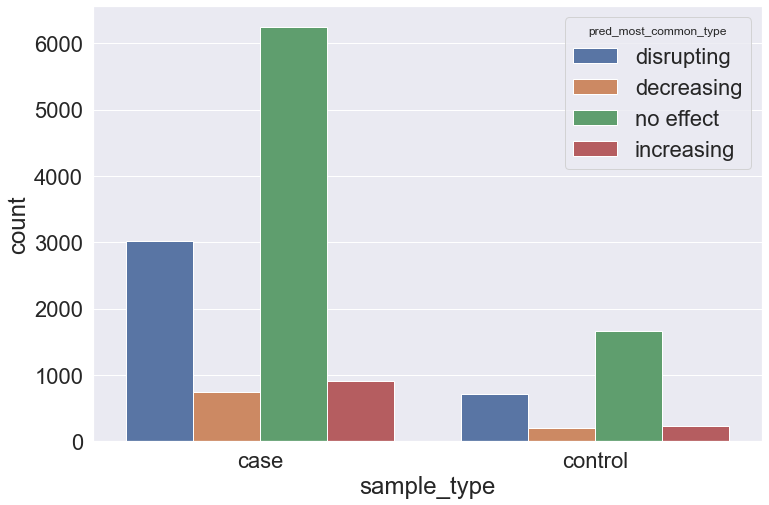

In [221]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set(font_scale=2)
hue_order = ['disrupting', 'decreasing', 'no effect', 'increasing']
test_plot = sns.countplot(data=master_table, x='sample_type', hue='pred_most_common_type', ax=ax, hue_order=hue_order)

In [215]:
master_table.groupby('sample_type')['pred_most_common'].value_counts(sort=False)

sample_type  pred_most_common
case         0                   3015
             1                    742
             2                   6244
             3                    916
control      0                    708
             1                    200
             2                   1666
             3                    230
Name: pred_most_common, dtype: int64

In [199]:
master_table['SIFT_pred'].value_counts()

D    8212
T    5188
.     309
Name: SIFT_pred, dtype: int64

In [200]:
master_table['Polyphen2_HDIV_pred'].value_counts()

D    6958
B    4513
P    2138
.     100
Name: Polyphen2_HDIV_pred, dtype: int64

In [201]:
master_table['pred_most_common'].value_counts()

2    7910
0    3723
3    1146
1     942
Name: pred_most_common, dtype: int64

In [202]:
master_table['FATHMM_pred'].value_counts()

T    9982
D    2938
.     789
Name: FATHMM_pred, dtype: int64

In [134]:
master_table.groupby(['FATHMM_pred', 'sample_type']).size()

FATHMM_pred  sample_type
.            case            635
             control         154
D            case           2406
             control         532
T            case           7868
             control        2114
dtype: int64

In [135]:
master_table.groupby(['pred_most_common', 'sample_type']).size()

pred_most_common  sample_type
0                 case           3015
                  control         708
1                 case            742
                  control         200
2                 case           6244
                  control        1666
3                 case            916
                  control         230
dtype: int64

In [137]:
master_table['sample_type'].value_counts()

case       10917
control     2804
Name: sample_type, dtype: int64

In [209]:
master_table.groupby(['pred_most_common', 'SIFT_pred'])['SIFT_pred'].count()

pred_most_common  SIFT_pred
0                 .              82
                  D            2725
                  T             913
1                 .              35
                  D             583
                  T             321
2                 .             167
                  D            4324
                  T            3413
3                 .              25
                  D             580
                  T             541
Name: SIFT_pred, dtype: int64

In [222]:
master_table['pred_disrupting'].sum()

77943

In [223]:
master_table['pred_decreasing'].sum()

27268

In [224]:
master_table['pred_noeffect'].sum()

144443

In [225]:
master_table['pred_increasing'].sum()

24704

In [229]:
master_table.shape

(13721, 182)